# **1) Extracci√≥n del Archivo Tratado**

In [ ]:
import pandas as pd

# Importamos los datos tratados.
df = pd.read_csv('/content/datos_tratados.csv')
df.head()


ID_Cliente  Dejo_el_servicio Genero  Ciudadano_Mayor  Pareja  Dependientes  \
0  0002ORFBO                 0      f                0       1             1   
1  0003MKNFE                 0      m                0       0             0   
2  0004TLHLJ                 1      m                0       0             0   
3  0011IGKFF                 1      m                1       1             0   
4  0013EXCHZ                 1      f                1       1             0   

   Tiempo_Servicio  Servicio_Telefonico Multiples_Lineas Servicio_Internet  \
0                9                    1               no               dsl   
1                9                    1               si               dsl   
2                4                    1               no      fibra optica   
3               13                    1               no      fibra optica   
4                3                    1               no      fibra optica   

   ... Soporte_Tecnico Streaming_TV Streaming_Peliculas   Contrato  \
0  ...              si           si                  no     un ano   
1  ...              no           no                  si  mes a mes   
2  ...              no           no                  no  mes a mes   
3  ...              no           si                  si  mes a mes   
4  ...              si           si                  no  mes a mes   

  Facturacion_Electronica                Metodo_Pago Cargos_Mensuales  \
0                       1  cheque enviado por correo             65.6   
1                       0  cheque enviado por correo             59.9   
2                       1         cheque electronico             73.9   
3                       1         cheque electronico             98.0   
4                       1  cheque enviado por correo             83.9   

   Cargos_Totales Cuentas_Diarias  Cantidad_Servicios  
0          593.30        2.155059                   5  
1          542.40        1.967806                   4  
2          280.85        2.427727                   3  
3         1237.85        3.219448                   6  
4          267.40        2.756242                   4  

[5 rows x 23 columns]

In [ ]:
# Vemos informaci√≥n general sobre el DataFrame (tipos de datos, valores no nulos, etc.)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Cliente               7267 non-null   object 
 1   Dejo_el_servicio         7267 non-null   int64  
 2   Genero                   7267 non-null   object 
 3   Ciudadano_Mayor          7267 non-null   int64  
 4   Pareja                   7267 non-null   int64  
 5   Dependientes             7267 non-null   int64  
 6   Tiempo_Servicio          7267 non-null   int64  
 7   Servicio_Telefonico      7267 non-null   int64  
 8   Multiples_Lineas         7267 non-null   object 
 9   Servicio_Internet        7267 non-null   object 
 10  Seguridad_Online         7267 non-null   object 
 11  Copia_Seguridad_Online   7267 non-null   object 
 12  Proteccion_Dispositivo   7267 non-null   object 
 13  Soporte_Tecnico          7267 non-null   object 
 14  Streaming_TV            

## **2) Eliminaci√≥n de Columnas Irrelevantes**

In [ ]:
# Eliminar la columna ID_Cliente
print("DataFrame despu√©s de eliminar 'ID_Cliente':")
df.head()

DataFrame despu√©s de eliminar 'ID_Cliente':


ID_Cliente  Dejo_el_servicio Genero  Ciudadano_Mayor  Pareja  Dependientes  \
0  0002ORFBO                 0      f                0       1             1   
1  0003MKNFE                 0      m                0       0             0   
2  0004TLHLJ                 1      m                0       0             0   
3  0011IGKFF                 1      m                1       1             0   
4  0013EXCHZ                 1      f                1       1             0   

   Tiempo_Servicio  Servicio_Telefonico Multiples_Lineas Servicio_Internet  \
0                9                    1               no               dsl   
1                9                    1               si               dsl   
2                4                    1               no      fibra optica   
3               13                    1               no      fibra optica   
4                3                    1               no      fibra optica   

   ... Soporte_Tecnico Streaming_TV Streaming_Peliculas   Contrato  \
0  ...              si           si                  no     un ano   
1  ...              no           no                  si  mes a mes   
2  ...              no           no                  no  mes a mes   
3  ...              no           si                  si  mes a mes   
4  ...              si           si                  no  mes a mes   

  Facturacion_Electronica                Metodo_Pago Cargos_Mensuales  \
0                       1  cheque enviado por correo             65.6   
1                       0  cheque enviado por correo             59.9   
2                       1         cheque electronico             73.9   
3                       1         cheque electronico             98.0   
4                       1  cheque enviado por correo             83.9   

   Cargos_Totales Cuentas_Diarias  Cantidad_Servicios  
0          593.30        2.155059                   5  
1          542.40        1.967806                   4  
2          280.85        2.427727                   3  
3         1237.85        3.219448                   6  
4          267.40        2.756242                   4  

[5 rows x 23 columns]

In [ ]:
# Revisamos las columnas restantes
print(df.columns.tolist())

['ID_Cliente', 'Dejo_el_servicio', 'Genero', 'Ciudadano_Mayor', 'Pareja', 'Dependientes', 'Tiempo_Servicio', 'Servicio_Telefonico', 'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online', 'Copia_Seguridad_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Contrato', 'Facturacion_Electronica', 'Metodo_Pago', 'Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias', 'Cantidad_Servicios']


# **3) Encoding**

Transformamos las variables categ√≥ricas a formato num√©rico para hacerlas compatibles con los algoritmos de machine learning.

In [ ]:
# Importamos la librer√≠a necesaria
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Creamos una copia del DataFrame para no modificar el original (Es una buena pr√°ctica conservar el original)
df_codificado = df.copy()

In [ ]:
# Identificamos autom√°ticamente las columnas categ√≥ricas (tipo 'object')
columnas_categoricas = df_codificado.select_dtypes(include=['object']).columns.tolist()

print("Columnas categ√≥ricas identificadas:")
print(columnas_categoricas)

Columnas categ√≥ricas identificadas:
['ID_Cliente', 'Genero', 'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online', 'Copia_Seguridad_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Contrato', 'Metodo_Pago']


In [ ]:
# Creamos un diccionario para guardar los codificadores (√∫til si en el futuro necesitamos decodificar o entender las transformaciones)
label_encoders = {}

In [ ]:
# Aplicamos LabelEncoder a cada columna categ√≥rica
for columna in columnas_categoricas:
    le = LabelEncoder()
    # Ajustamos el codificador y transformamos la columna
    df_codificado[columna] = le.fit_transform(df_codificado[columna])
    # Guardamos el codificador para referencia
    label_encoders[columna] = le
    print(f"\nTransformaci√≥n para '{columna}':")
    # Mostramos las clases originales y su correspondencia num√©rica (Esto me costo mucho tiempo entenderlo y hacerlo)
    for i, clase in enumerate(le.classes_):
        print(f"  '{clase}' -> {i}")


Transformaci√≥n para 'ID_Cliente':
  '0002ORFBO' -> 0
  '0003MKNFE' -> 1
  '0004TLHLJ' -> 2
  '0011IGKFF' -> 3
  '0013EXCHZ' -> 4
  '0013MHZWF' -> 5
  '0013SMEOE' -> 6
  '0014BMAQU' -> 7
  '0015UOCOJ' -> 8
  '0016QLJIS' -> 9
  '0017DINOC' -> 10
  '0017IUDMW' -> 11
  '0018NYROU' -> 12
  '0019EFAEP' -> 13
  '0019GFNTW' -> 14
  '0020INWCK' -> 15
  '0020JDNXP' -> 16
  '0021IKXGC' -> 17
  '0022TCJCI' -> 18
  '0023HGHWL' -> 19
  '0023UYUPN' -> 20
  '0023XUOPT' -> 21
  '0027KWYKW' -> 22
  '0030FNXPP' -> 23
  '0031PVLZI' -> 24
  '0032PGELS' -> 25
  '0036IHMOT' -> 26
  '0040HALCW' -> 27
  '0042JVWOJ' -> 28
  '0042RLHYP' -> 29
  '0047ZHDTW' -> 30
  '0048LUMLS' -> 31
  '0048PIHNL' -> 32
  '0052DCKON' -> 33
  '0052YNYOT' -> 34
  '0056EPFBG' -> 35
  '0057QBUQH' -> 36
  '0058EVZWM' -> 37
  '0060FUALY' -> 38
  '0064SUDOG' -> 39
  '0064YIJGF' -> 40
  '0067DKWBL' -> 41
  '0068FIGTF' -> 42
  '0071NDAFP' -> 43
  '0074HDKDG' -> 44
  '0076LVEPS' -> 45
  '0078XZMHT' -> 46
  '0080EMYVY' -> 47
  '0080OROZO' 

In [ ]:
# Verificamos el resultado mostrando las primeras filas
print("\nDataFrame despu√©s de la codificaci√≥n:")
df_codificado.head()


DataFrame despu√©s de la codificaci√≥n:


ID_Cliente  Dejo_el_servicio  Genero  Ciudadano_Mayor  Pareja  \
0           0                 0       0                0       1   
1           1                 0       1                0       0   
2           2                 1       1                0       0   
3           3                 1       1                1       1   
4           4                 1       0                1       1   

   Dependientes  Tiempo_Servicio  Servicio_Telefonico  Multiples_Lineas  \
0             1                9                    1                 0   
1             0                9                    1                 2   
2             0                4                    1                 0   
3             0               13                    1                 0   
4             0                3                    1                 0   

   Servicio_Internet  ...  Soporte_Tecnico  Streaming_TV  Streaming_Peliculas  \
0                  0  ...                2             2                    0   
1                  0  ...                0             0                    2   
2                  1  ...                0             0                    0   
3                  1  ...                0             2                    2   
4                  1  ...                2             2                    0   

   Contrato  Facturacion_Electronica  Metodo_Pago  Cargos_Mensuales  \
0         2                        1            2              65.6   
1         1                        0            2              59.9   
2         1                        1            1              73.9   
3         1                        1            1              98.0   
4         1                        1            2              83.9   

   Cargos_Totales  Cuentas_Diarias  Cantidad_Servicios  
0          593.30         2.155059                   5  
1          542.40         1.967806                   4  
2          280.85         2.427727                   3  
3         1237.85         3.219448                   6  
4          267.40         2.756242                   4  

[5 rows x 23 columns]

## **4) Verificaci√≥n de la Proporci√≥n de Cancelaci√≥n (Dejo el servicio)** Antiguo Churn.

Calcula la proporci√≥n de clientes que cancelaron en relaci√≥n con los que permanecieron activos. Eval√∫a si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el an√°lisis de los resultados.

In [ ]:
# Verificamos la proporci√≥n de la variable objetivo 'Dejo_el_servicio'
# 0 significa que el cliente NO dej√≥ el servicio
# 1 significa que el cliente S√ç dej√≥ el servicio

# Contamos la cantidad de clientes en cada categor√≠a
conteo_cancelaciones = df_codificado['Dejo_el_servicio'].value_counts()

# Calculamos las proporciones (porcentajes)
proporcion_cancelaciones = df_codificado['Dejo_el_servicio'].value_counts(normalize=True) * 100

In [ ]:
# Mostramos los resultados
print("Conteo de clientes por estado de cancelaci√≥n:")
print(conteo_cancelaciones)
print("\nProporci√≥n (porcentaje) de clientes por estado de cancelaci√≥n:")
print(proporcion_cancelaciones)

Conteo de clientes por estado de cancelaci√≥n:
Dejo_el_servicio
0    5398
1    1869
Name: count, dtype: int64

Proporci√≥n (porcentaje) de clientes por estado de cancelaci√≥n:
Dejo_el_servicio
0    74.280996
1    25.719004
Name: proportion, dtype: float64


In [ ]:
# Tambi√©n podemos mostrarlo de forma m√°s visual
print("\nResumen detallado:")
print(f"Clientes que NO dejaron el servicio fueron (0): {conteo_cancelaciones[0]} (con un {proporcion_cancelaciones[0]:.2f}%)")
print(f"Clientes que S√ç dejaron el servicio fueron (1): {conteo_cancelaciones[1]} (con un {proporcion_cancelaciones[1]:.2f}%)")


Resumen detallado:
Clientes que NO dejaron el servicio fueron (0): 5398 (con un 74.28%)
Clientes que S√ç dejaron el servicio fueron (1): 1869 (con un 25.72%)


In [ ]:
# Evaluamos el desbalance
diferencia_porcentual = abs(proporcion_cancelaciones[0] - proporcion_cancelaciones[1])
print(f"\nDiferencia porcentual entre clases: {diferencia_porcentual:.2f}%")

if diferencia_porcentual > 15:
    print("-> Las clases est√°n desbalanceadas. Esto puede afectar el rendimiento de los modelos.")
elif diferencia_porcentual > 5:
    print("-> Hay un leve desbalance entre las clases.")
else:
    print("-> Las clases est√°n bastante balanceadas.")


Diferencia porcentual entre clases: 48.56%
-> Las clases est√°n desbalanceadas. Esto puede afectar el rendimiento de los modelos.


## **5) Balanceo de Clases (opcional)**

Si deseas profundizar en el an√°lisis, aplica t√©cnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser √∫tiles para generar ejemplos sint√©ticos de la clase minoritaria.

In [ ]:
# Instalamos la librer√≠a necesaria
!pip install imbalanced-learn

In [ ]:
# Importamos las librer√≠as necesarias
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Separamos las caracter√≠sticas (X) de la variable objetivo (y)
X = df_codificado.drop('Dejo_el_servicio', axis=1)
y = df_codificado['Dejo_el_servicio']

print("Distribuci√≥n original de las clases:")
print(sorted(Counter(y).items()))

Distribuci√≥n original de las clases:
[(0, 5398), (1, 1869)]


In [ ]:
# 1. Aplicamos Undersampling (reducir la clase mayoritaria)
print("\n--- Aplicando Undersampling ---")
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_under, y_under = undersample.fit_resample(X, y)
print('Distribuci√≥n despu√©s de undersampling:')
print(sorted(Counter(y_under).items()))


--- Aplicando Undersampling ---
Distribuci√≥n despu√©s de undersampling:
[(0, 1869), (1, 1869)]


In [ ]:
# 2. Aplicamos Oversampling (aumentar la clase minoritaria)
print("\n--- Aplicando Oversampling ---")

# Fill missing values in 'Cargos_Totales' with the mean
X_filled = X.fillna(X['Cargos_Totales'].mean())

oversample = SMOTE(sampling_strategy='minority', random_state=42)
X_over, y_over = oversample.fit_resample(X_filled, y)
print('Distribuci√≥n despu√©s de oversampling:')
print(sorted(Counter(y_over).items()))


--- Aplicando Oversampling ---
Distribuci√≥n despu√©s de oversampling:
[(0, 5398), (1, 5398)]


## **6) Normalizaci√≥n o Estandarizaci√≥n (si es necesario).**

Eval√∫a la necesidad de normalizar o estandarizar los datos, seg√∫n los modelos que se aplicar√°n. Modelos basados en distancia, como KNN, SVM, Regresi√≥n Log√≠stica y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en √°rboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [ ]:
# Mostramos las estad√≠sticas descriptivas de las columnas num√©ricas
print("Estad√≠sticas descriptivas de las variables num√©ricas:")
print(df_codificado.describe())

# Veamos tambi√©n las columnas que tenemos
print("\nColumnas en el DataFrame codificado:")
print(df_codificado.columns.tolist())

Estad√≠sticas descriptivas de las variables num√©ricas:
        ID_Cliente  Dejo_el_servicio       Genero  Ciudadano_Mayor  \
count  7267.000000       7267.000000  7267.000000      7267.000000   
mean   3633.000000          0.257190     0.505711         0.162653   
std    2097.946536          0.437115     0.500002         0.369074   
min       0.000000          0.000000     0.000000         0.000000   
25%    1816.500000          0.000000     0.000000         0.000000   
50%    3633.000000          0.000000     1.000000         0.000000   
75%    5449.500000          1.000000     1.000000         0.000000   
max    7266.000000          1.000000     1.000000         1.000000   

            Pareja  Dependientes  Tiempo_Servicio  Servicio_Telefonico  \
count  7267.000000   7267.000000      7267.000000          7267.000000   
mean      0.484106      0.300124        32.346498             0.902711   
std       0.499782      0.458343        24.571773             0.296371   
min       0.00000

In [ ]:
# Evaluamos la necesidad de escalado:
# Importamos las librer√≠as necesarias
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
# Mostramos informaci√≥n sobre la necesidad de escalado
print("=== EVALUACI√ìN DE LA NECESIDAD DE ESCALADO ===")
print("\nRango de valores en algunas columnas num√©ricas clave:")

# Mostramos el rango de algunas variables importantes
variables_a_ver = ['Cargos_Mensuales', 'Cargos_Totales', 'Tiempo_Servicio', 'Cantidad_Servicios']
for var in variables_a_ver:
    if var in df_codificado.columns:
        min_val = df_codificado[var].min()
        max_val = df_codificado[var].max()
        print(f"  {var}: min={min_val}, max={max_val}")

=== EVALUACI√ìN DE LA NECESIDAD DE ESCALADO ===

Rango de valores en algunas columnas num√©ricas clave:
  Cargos_Mensuales: min=18.25, max=118.75
  Cargos_Totales: min=18.8, max=8684.8
  Tiempo_Servicio: min=0, max=72
  Cantidad_Servicios: min=1, max=9


In [ ]:
# Ejemplo de c√≥mo aplicar estandarizaci√≥n si fuera necesario
print("\n=== EJEMPLO DE ESTANDARIZACI√ìN (para modelos que la requieren) ===")

# Separamos las caracter√≠sticas de la variable objetivo
X = df_codificado.drop('Dejo_el_servicio', axis=1)
y = df_codificado['Dejo_el_servicio']

# Aplicamos StandardScaler
scaler = StandardScaler()
X_estandarizado = scaler.fit_transform(X)

# Convertimos de vuelta a DataFrame para facilitar su uso
X_estandarizado_df = pd.DataFrame(X_estandarizado, columns=X.columns)

print("Datos antes de estandarizar (primeras 5 filas de algunas columnas):")
print(X[['Cargos_Mensuales', 'Cargos_Totales', 'Tiempo_Servicio']].head())

print("\nDatos despu√©s de estandarizar (primeras 5 filas de las mismas columnas):")
print(X_estandarizado_df[['Cargos_Mensuales', 'Cargos_Totales', 'Tiempo_Servicio']].head())

print("\nEstad√≠sticas despu√©s de estandarizar:")
print(X_estandarizado_df[['Cargos_Mensuales', 'Cargos_Totales', 'Tiempo_Servicio']].describe())


=== EJEMPLO DE ESTANDARIZACI√ìN (para modelos que la requieren) ===
Datos antes de estandarizar (primeras 5 filas de algunas columnas):
   Cargos_Mensuales  Cargos_Totales  Tiempo_Servicio
0              65.6          593.30                9
1              59.9          542.40                9
2              73.9          280.85                4
3              98.0         1237.85               13
4              83.9          267.40                3

Datos despu√©s de estandarizar (primeras 5 filas de las mismas columnas):
   Cargos_Mensuales  Cargos_Totales  Tiempo_Servicio
0          0.029206       -0.743818        -0.950200
1         -0.159990       -0.766256        -0.950200
2          0.304702       -0.881554        -1.153700
3          1.104635       -0.459685        -0.787401
4          0.636624       -0.887483        -1.194400

Estad√≠sticas despu√©s de estandarizar:
       Cargos_Mensuales  Cargos_Totales  Tiempo_Servicio
count      7.267000e+03    7.256000e+03     7.267000e+

### **Aplicando la estandarizaci√≥n a todo tu conjunto de datos.**

In [ ]:
# Importamos la librer√≠a necesaria para la estandarizaci√≥n
from sklearn.preprocessing import StandardScaler

In [ ]:
# Verificamos las columnas actuales de nuestro DataFrame
print("Columnas en el DataFrame antes de estandarizar:")
print(df_codificado.columns.tolist())

Columnas en el DataFrame antes de estandarizar:
['ID_Cliente', 'Dejo_el_servicio', 'Genero', 'Ciudadano_Mayor', 'Pareja', 'Dependientes', 'Tiempo_Servicio', 'Servicio_Telefonico', 'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online', 'Copia_Seguridad_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Contrato', 'Facturacion_Electronica', 'Metodo_Pago', 'Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias', 'Cantidad_Servicios']


In [ ]:
# Separamos las caracter√≠sticas (X) de la variable objetivo (y)
# 'Dejo_el_servicio' es la variable objetivo
X = df_codificado.drop('Dejo_el_servicio', axis=1)
y = df_codificado['Dejo_el_servicio']

print(f"\nForma de X (caracter√≠sticas) antes de estandarizar: {X.shape}")
print(f"Forma de y (objetivo) antes de estandarizar: {y.shape}")


Forma de X (caracter√≠sticas) antes de estandarizar: (7267, 22)
Forma de y (objetivo) antes de estandarizar: (7267,)


In [ ]:
# Creamos el objeto StandardScaler
scaler = StandardScaler()

# Ajustamos el scaler a los datos de entrenamiento y transformamos
# Esto calcula la media y desviaci√≥n est√°ndar de cada columna y luego aplica la transformaci√≥n
X_estandarizado = scaler.fit_transform(X)

In [ ]:
# Creamos un nuevo DataFrame con los datos estandarizados
df_estandarizado = X_estandarizado_df.copy()
df_estandarizado['Dejo_el_servicio'] = y

print(f"\nForma del nuevo DataFrame estandarizado: {df_estandarizado.shape}")

# Mostramos las primeras filas para ver el resultado
print("\nPrimeras filas del DataFrame ESTANDARIZADO:")
print(df_estandarizado.head())

# Verificamos que la estandarizaci√≥n funcion√≥ correctamente
# Despu√©s de la estandarizaci√≥n, cada columna deber√≠a tener media cercana a 0 y desviaci√≥n est√°ndar cercana a 1
print("\nEstad√≠sticas descriptivas despu√©s de estandarizar (deber√≠an tener media‚âà0 y std‚âà1):")
print(X_estandarizado_df.describe())



Forma del nuevo DataFrame estandarizado: (7267, 23)

Primeras filas del DataFrame ESTANDARIZADO:
   ID_Cliente    Genero  Ciudadano_Mayor    Pareja  Dependientes  \
0   -1.731812 -1.011487        -0.440736  1.032309      1.527075   
1   -1.731336  0.988643        -0.440736 -0.968702     -0.654847   
2   -1.730859  0.988643        -0.440736 -0.968702     -0.654847   
3   -1.730382  0.988643         2.268932  1.032309     -0.654847   
4   -1.729906 -1.011487         2.268932  1.032309     -0.654847   

   Tiempo_Servicio  Servicio_Telefonico  Multiples_Lineas  Servicio_Internet  \
0        -0.950200              0.32829         -0.992156          -1.186213   
1        -0.950200              0.32829          1.116955          -1.186213   
2        -1.153700              0.32829         -0.992156           0.169166   
3        -0.787401              0.32829         -0.992156           0.169166   
4        -1.194400              0.32829         -0.992156           0.169166   

   Seguridad

## **7) An√°lisis de Correlaci√≥n**

Visualiza la matriz de correlaci√≥n para identificar relaciones entre las variables num√©ricas. Presta especial atenci√≥n a las variables que muestran una mayor correlaci√≥n con la cancelaci√≥n, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [ ]:
# Importamos las librer√≠as necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Verificamos que estamos usando el DataFrame codificado y estandarizado
print("Usando el DataFrame estandarizado para el an√°lisis de correlaci√≥n")
print(f"Forma del DataFrame: {df_estandarizado.shape}")

Usando el DataFrame estandarizado para el an√°lisis de correlaci√≥n
Forma del DataFrame: (7267, 23)


In [ ]:
# Calculamos la matriz de correlaci√≥n
# Esta matriz muestra c√≥mo se relacionan linealmente todas las variables num√©ricas entre s√≠
matriz_correlacion = df_estandarizado.corr()

# Mostramos las correlaciones de todas las variables con respecto a 'Dejo_el_servicio'
# Ordenamos de mayor a menor para ver las m√°s fuertes
correlaciones_con_objetivo = matriz_correlacion['Dejo_el_servicio'].sort_values(key=abs, ascending=False)

print("\n=== CORRELACIONES CON LA VARIABLE OBJETIVO 'Dejo_el_servicio' ===")
print("(Ordenadas por valor absoluto - las m√°s fuertes primero)")
for variable, correlacion in correlaciones_con_objetivo.items():
    print(f"  {variable}: {correlacion:.4f}")

# Identificamos las variables con correlaci√≥n m√°s fuerte (abs > 0.2)
print("\n=== VARIABLES CON CORRELACI√ìN FUERTE (|r| > 0.2) ===")
variables_fuertes = correlaciones_con_objetivo[abs(correlaciones_con_objetivo) > 0.2]
if len(variables_fuertes) > 1:  # >1 porque siempre estar√° 'Dejo_el_servicio' consigo misma (1.0)
    # Excluimos la variable objetivo consigo misma
    variables_fuertes_sin_objetivo = variables_fuertes.drop('Dejo_el_servicio')
    for variable, correlacion in variables_fuertes_sin_objetivo.items():
        print(f"  {variable}: {correlacion:.4f}")
else:
    print("No se encontraron variables con correlaci√≥n fuerte (>0.2)")


=== CORRELACIONES CON LA VARIABLE OBJETIVO 'Dejo_el_servicio' ===
(Ordenadas por valor absoluto - las m√°s fuertes primero)
  Dejo_el_servicio: 1.0000
  Tiempo_Servicio: -0.3441
  Seguridad_Online: -0.2831
  Soporte_Tecnico: -0.2764
  Cargos_Totales: -0.1944
  Copia_Seguridad_Online: -0.1917
  Cuentas_Diarias: 0.1899
  Cargos_Mensuales: 0.1899
  Facturacion_Electronica: 0.1867
  Proteccion_Dispositivo: -0.1736
  Dependientes: -0.1614
  Pareja: -0.1485
  Ciudadano_Mayor: 0.1467
  Metodo_Pago: -0.0930
  Contrato: 0.0826
  Servicio_Internet: -0.0481
  Streaming_Peliculas: -0.0378
  Multiples_Lineas: 0.0370
  Streaming_TV: -0.0359
  ID_Cliente: -0.0196
  Cantidad_Servicios: -0.0177
  Servicio_Telefonico: 0.0126
  Genero: -0.0096

=== VARIABLES CON CORRELACI√ìN FUERTE (|r| > 0.2) ===
  Tiempo_Servicio: -0.3441
  Seguridad_Online: -0.2831
  Soporte_Tecnico: -0.2764



=== GENERANDO MAPA DE CALOR DE CORRELACIONES ===


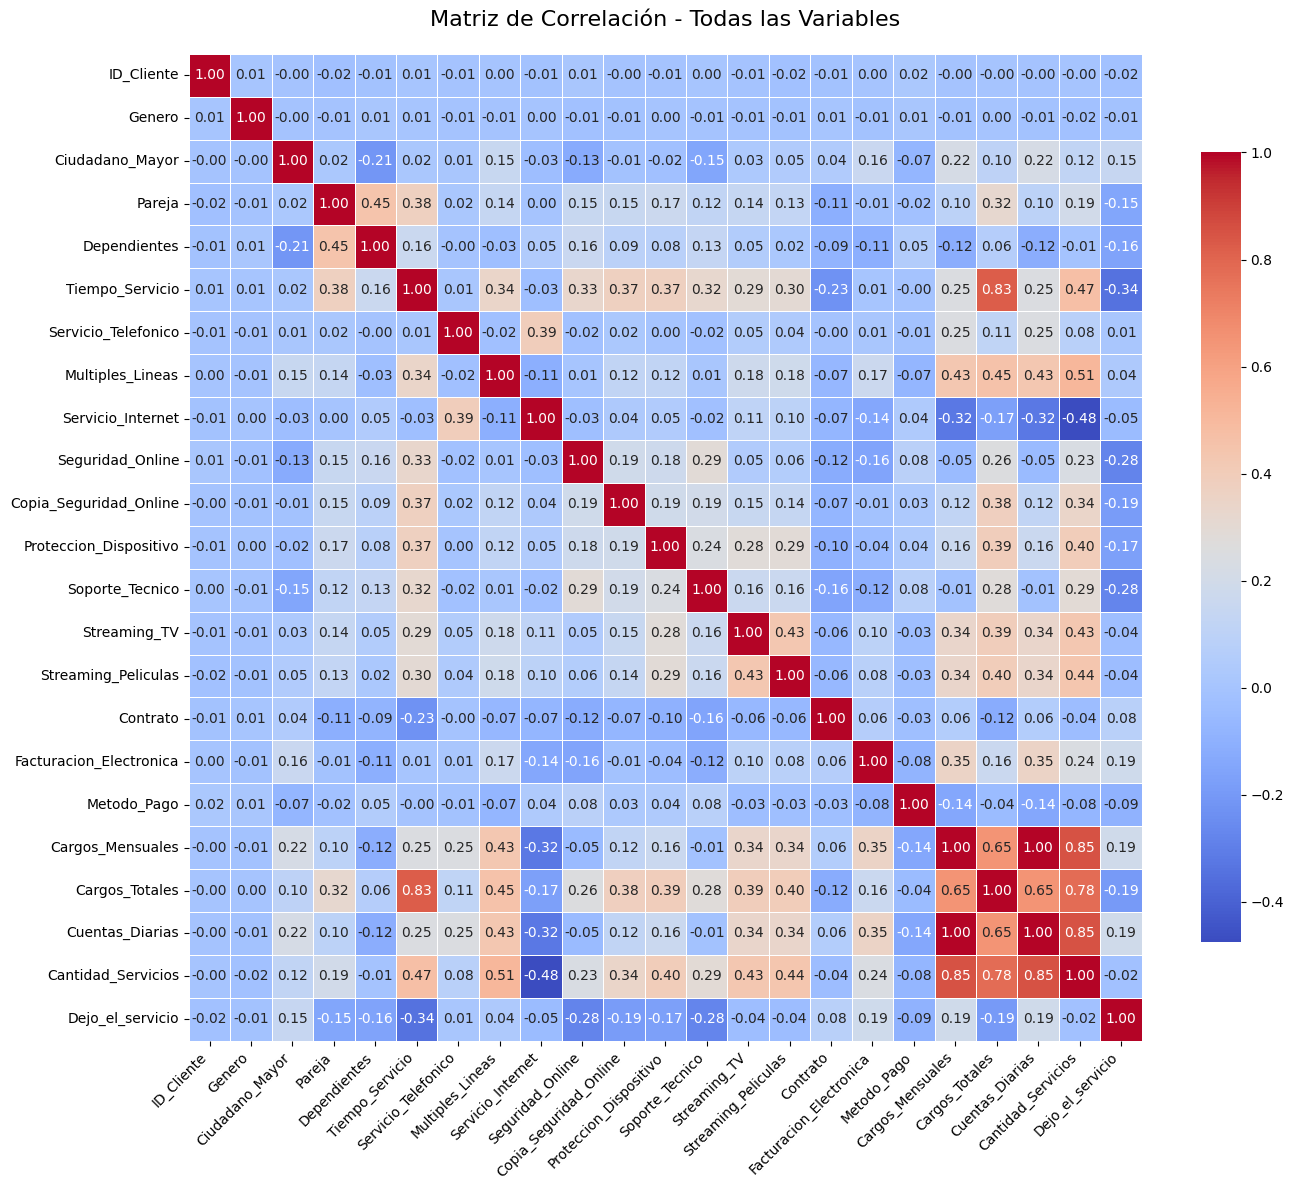

In [ ]:
# Visualizamos la matriz de correlaci√≥n completa (mapa de calor)
print("\n=== GENERANDO MAPA DE CALOR DE CORRELACIONES ===")
plt.figure(figsize=(14, 12))  # Tama√±o grande para ver todas las variables

# Creamos el mapa de calor, descripcion de los terminos.
# - `annot=True` muestra los valores num√©ricos en cada celda
# - `cmap='coolwarm'` usa un esquema de color donde rojo es correlaci√≥n positiva y azul negativa
# - `fmt='.2f'` muestra los n√∫meros con 2 decimales
# - `linewidths=0.5` a√±ade l√≠neas para separar las celdas
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})

# Personalizamos el gr√°fico
plt.title('Matriz de Correlaci√≥n - Todas las Variables', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')  # Rotamos las etiquetas del eje X para mejor legibilidad
plt.yticks(rotation=0)  # Mantenemos las etiquetas del eje Y horizontales
plt.tight_layout()  # Ajusta el layout para que todo quepa

# Mostramos el gr√°fico
plt.show()


=== GR√ÅFICO DE BARRAS - CORRELACIONES FUERTES CON 'Dejo_el_servicio' ===


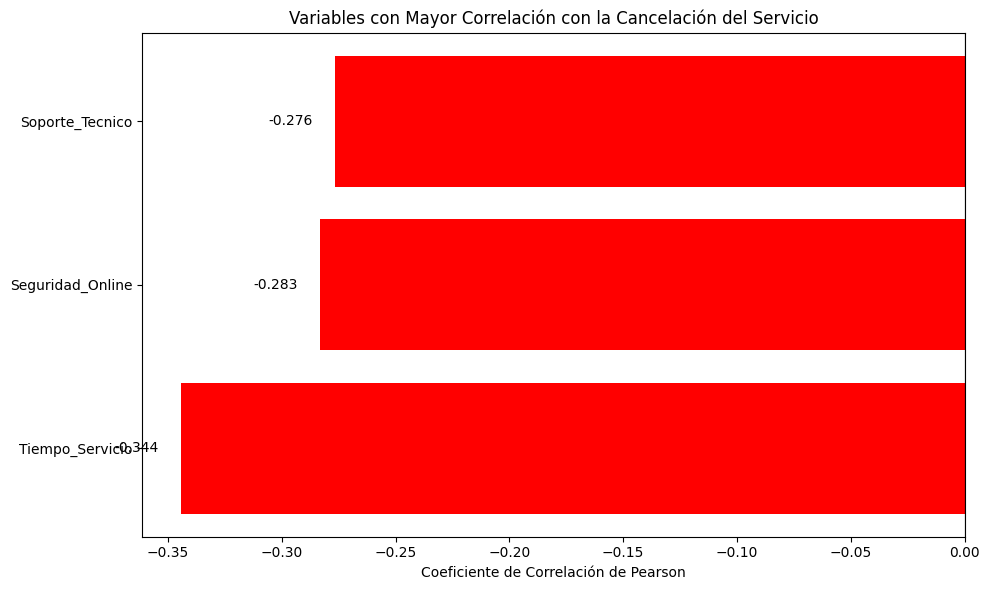


=== INTERPRETACI√ìN ===
La correlaci√≥n de Pearson mide la relaci√≥n lineal entre dos variables:
- Valores cercanos a +1 indican una fuerte correlaci√≥n positiva.
- Valores cercanos a -1 indican una fuerte correlaci√≥n negativa.
- Valores cercanos a 0 indican poca o ninguna relaci√≥n lineal.

Variables con correlaci√≥n fuerte con 'Dejo_el_servicio' son buenas candidatas para el modelo predictivo.


In [ ]:
# Visualizaci√≥n enfocada: Correlaciones m√°s fuertes con la variable objetivo
print("\n=== GR√ÅFICO DE BARRAS - CORRELACIONES FUERTES CON 'Dejo_el_servicio' ===")
if len(variables_fuertes_sin_objetivo) > 0:
    plt.figure(figsize=(10, max(6, len(variables_fuertes_sin_objetivo) * 0.4)))  # Ajustar tama√±o seg√∫n cantidad de variables

    # Creamos un gr√°fico de barras horizontales
    colores = ['red' if corr < 0 else 'blue' for corr in variables_fuertes_sin_objetivo.values]
    bars = plt.barh(range(len(variables_fuertes_sin_objetivo)), variables_fuertes_sin_objetivo.values, color=colores)

    # Personalizamos el gr√°fico
    plt.yticks(range(len(variables_fuertes_sin_objetivo)), variables_fuertes_sin_objetivo.index)
    plt.xlabel('Coeficiente de Correlaci√≥n de Pearson')
    plt.title('Variables con Mayor Correlaci√≥n con la Cancelaci√≥n del Servicio')
    plt.axvline(0, color='black', linewidth=0.8)  # L√≠nea vertical en 0 para referencia

    # A√±adimos los valores num√©ricos en las barras
    for i, (bar, valor) in enumerate(zip(bars, variables_fuertes_sin_objetivo.values)):
        plt.text(valor + (0.01 if valor >= 0 else -0.01), i, f'{valor:.3f}',
                va='center', ha='left' if valor >= 0 else 'right')

    plt.tight_layout()
    plt.show()
else:
    print("No hay variables con correlaci√≥n fuerte para mostrar en el gr√°fico.")

print("\n=== INTERPRETACI√ìN ===")
print("La correlaci√≥n de Pearson mide la relaci√≥n lineal entre dos variables:")
print("- Valores cercanos a +1 indican una fuerte correlaci√≥n positiva.")
print("- Valores cercanos a -1 indican una fuerte correlaci√≥n negativa.")
print("- Valores cercanos a 0 indican poca o ninguna relaci√≥n lineal.")
print("\nVariables con correlaci√≥n fuerte con 'Dejo_el_servicio' son buenas candidatas para el modelo predictivo.")

## **8) An√°lisis Dirigido**

Investiga c√≥mo variables espec√≠ficas se relacionan con la cancelaci√≥n, tales como:

Tiempo de contrato √ó Cancelaci√≥n

Gasto total √ó Cancelaci√≥n

Utiliza gr√°ficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

In [ ]:
# Importamos librer√≠as necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# Usaremos el df estandarizado para el analisis
# Creamos una copia para no modificar el original
df_analisis = df_estandarizado.copy()

In [ ]:
# 1. An√°lisis: Tiempo de contrato vs Cancelaci√≥n
print("=== AN√ÅLISIS: TIEMPO DE CONTRATO vs CANCELACI√ìN ===")

# Primero, necesitamos la columna original de 'Contrato' para interpretar mejor los datos
# Como esta columna fue codificada, vamos a asumir que:
# 'mes a mes' -> 0, 'un ano' -> 1, 'dos anos' -> 2 (o similar)

# Contamos las cancelaciones por tipo de contrato
cancelaciones_por_contrato = df_analisis.groupby('Contrato')['Dejo_el_servicio'].agg(['count', 'sum', 'mean'])
cancelaciones_por_contrato.columns = ['Total_Clientes', 'Cancelaciones', 'Tasa_Cancelacion']
cancelaciones_por_contrato = cancelaciones_por_contrato.sort_values('Tasa_Cancelacion', ascending=False)

print("Tasa de cancelaci√≥n por tipo de contrato (codificado):")
print(cancelaciones_por_contrato)

=== AN√ÅLISIS: TIEMPO DE CONTRATO vs CANCELACI√ìN ===
Tasa de cancelaci√≥n por tipo de contrato (codificado):
           Total_Clientes  Cancelaciones  Tasa_Cancelacion
Contrato                                                  
 0.046056            4005           1655          0.413233
 1.540211            1519            166          0.109282
-1.448099            1743             48          0.027539


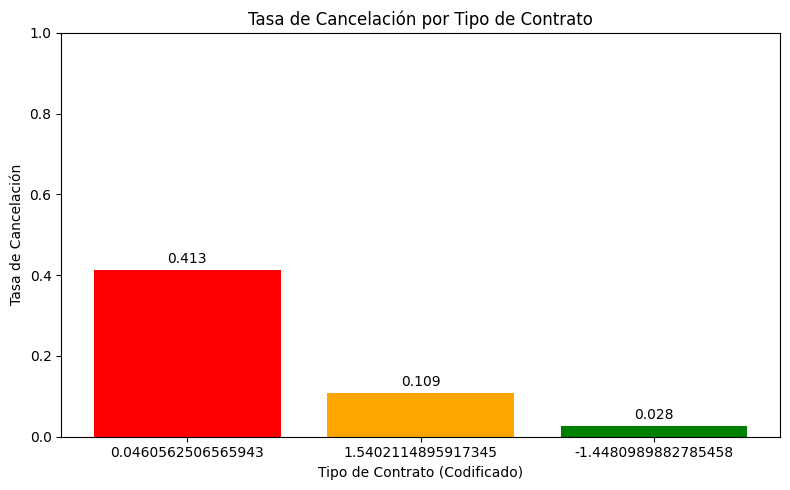

In [ ]:
# Creamos el gr√°fico de barras para la tasa de cancelaci√≥n por contrato
plt.figure(figsize=(8, 5))
bars = plt.bar(cancelaciones_por_contrato.index.astype(str), cancelaciones_por_contrato['Tasa_Cancelacion'],
               color=['red', 'orange', 'green'])
plt.xlabel('Tipo de Contrato (Codificado)')
plt.ylabel('Tasa de Cancelaci√≥n')
plt.title('Tasa de Cancelaci√≥n por Tipo de Contrato')
plt.ylim(0, 1)

# A√±adimos los valores sobre las barras
for i, (bar, valor) in enumerate(zip(bars, cancelaciones_por_contrato['Tasa_Cancelacion'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{valor:.3f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# 2. An√°lisis: Gasto Total (Cargos_Totales) vs Cancelaci√≥n
print("\n=== AN√ÅLISIS: GASTO TOTAL vs CANCELACI√ìN ===")

# Describimos la variable Cargos_Totales
print("Estad√≠sticas de Cargos_Totales:")
print(df_analisis['Cargos_Totales'].describe())




=== AN√ÅLISIS: GASTO TOTAL vs CANCELACI√ìN ===
Estad√≠sticas de Cargos_Totales:
count    7.256000e+03
mean    -1.958497e-18
std      1.000069e+00
min     -9.970718e-01
25%     -8.289304e-01
50%     -3.921725e-01
75%      6.632935e-01
max      2.823113e+00
Name: Cargos_Totales, dtype: float64


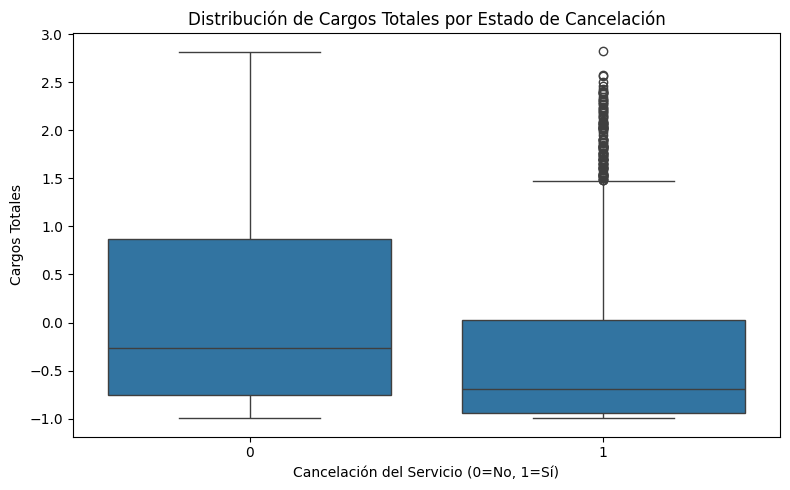

In [ ]:
# Creamos un boxplot para comparar la distribuci√≥n de Cargos_Totales entre clientes que cancelaron y no
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_analisis, x='Dejo_el_servicio', y='Cargos_Totales')
plt.xlabel('Cancelaci√≥n del Servicio (0=No, 1=S√≠)')
plt.ylabel('Cargos Totales')
plt.title('Distribuci√≥n de Cargos Totales por Estado de Cancelaci√≥n')
plt.tight_layout()
plt.show()

In [ ]:
# Tambi√©n podemos hacer un an√°lisis por rangos de gasto
# Creamos rangos de gasto
df_analisis['Rango_Cargos_Totales'] = pd.cut(df_analisis['Cargos_Totales'],
                                             bins=[0, 1000, 2000, 3000, 4000, np.inf],
                                             labels=['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000+'])

# Calculamos la tasa de cancelaci√≥n por rango
cancelaciones_por_rango = df_analisis.groupby('Rango_Cargos_Totales')['Dejo_el_servicio'].agg(['count', 'sum', 'mean'])
cancelaciones_por_rango.columns = ['Total_Clientes', 'Cancelaciones', 'Tasa_Cancelacion']

print("\nTasa de cancelaci√≥n por rango de Cargos Totales:")
print(cancelaciones_por_rango)


Tasa de cancelaci√≥n por rango de Cargos Totales:
                      Total_Clientes  Cancelaciones  Tasa_Cancelacion
Rango_Cargos_Totales                                                 
0-1000                          2723            476          0.174807
1000-2000                          0              0               NaN
2000-3000                          0              0               NaN
3000-4000                          0              0               NaN
4000+                              0              0               NaN


/tmp/ipython-input-1298299458.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancelaciones_por_rango = df_analisis.groupby('Rango_Cargos_Totales')['Dejo_el_servicio'].agg(['count', 'sum', 'mean'])


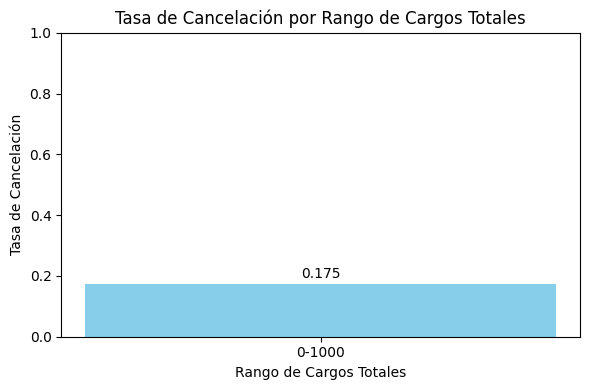

In [ ]:
# Gr√°fico de barras para la tasa de cancelaci√≥n por rango de gasto
plt.figure(figsize=(6, 4))
bars = plt.bar(cancelaciones_por_rango.index.astype(str), cancelaciones_por_rango['Tasa_Cancelacion'],
               color='skyblue')
plt.xlabel('Rango de Cargos Totales')
plt.ylabel('Tasa de Cancelaci√≥n')
plt.title('Tasa de Cancelaci√≥n por Rango de Cargos Totales')
plt.ylim(0, 1)

# A√±adimos los valores sobre las barras
for i, (bar, valor) in enumerate(zip(bars, cancelaciones_por_rango['Tasa_Cancelacion'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{valor:.3f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


=== AN√ÅLISIS COMBINADO: CONTRATO y CARGOS TOTALES ===


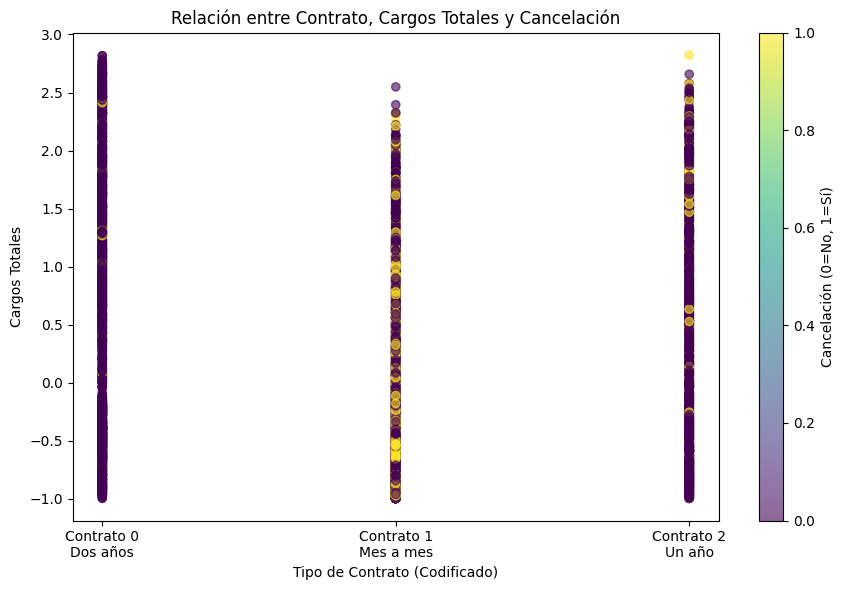


=== INTERPRETACI√ìN ===
1. TIEMPO DE CONTRATO:
   - Los contratos a corto plazo (como 'mes a mes = 1') suelen tener tasas de cancelaci√≥n m√°s altas.
   - Los contratos a largo plazo (como 'un a√±o = 2' o 'dos a√±os = 0') suelen retener m√°s clientes.

2. GASTO TOTAL:
   - Clientes con cargos totales muy bajos pueden tener mayor tasa de cancelaci√≥n (poco comprometidos).
   - Clientes con cargos totales muy altos tambi√©n pueden tener mayor tasa de cancelaci√≥n (posible insatisfacci√≥n).
   - Clientes con cargos totales intermedios pueden ser los m√°s fieles.

3. PATRONES:
   - Buscar combinaciones de contrato y gasto que muestren grupos de clientes que cancelan.


In [ ]:
# 3. An√°lisis combinado: Contrato y Cargos_Totales vs Cancelaci√≥n (Scatter plot / Diagrama de dispersi√≥n)
print("\n=== AN√ÅLISIS COMBINADO: CONTRATO y CARGOS TOTALES ===")

# Creamos un scatter plot coloreado por cancelaci√≥n
plt.figure(figsize=(9, 6))
scatter = plt.scatter(df_analisis['Contrato'], df_analisis['Cargos_Totales'],
                      c=df_analisis['Dejo_el_servicio'], cmap='viridis', alpha=0.6)
plt.xlabel('Tipo de Contrato (Codificado)')
plt.ylabel('Cargos Totales')
plt.title('Relaci√≥n entre Contrato, Cargos Totales y Cancelaci√≥n')
plt.colorbar(scatter, label='Cancelaci√≥n (0=No, 1=S√≠)')

# A√±adimos una leyenda para los tipos de contratos
plt.xticks(ticks=sorted(df_analisis['Contrato'].unique()),
           labels=['Contrato 0\nDos a√±os', 'Contrato 1\nMes a mes', 'Contrato 2\nUn a√±o'])
plt.tight_layout()
plt.show()

print("\n=== INTERPRETACI√ìN ===")
print("1. TIEMPO DE CONTRATO:")
print("   - Los contratos a corto plazo (como 'mes a mes = 1') suelen tener tasas de cancelaci√≥n m√°s altas.")
print("   - Los contratos a largo plazo (como 'un a√±o = 2' o 'dos a√±os = 0') suelen retener m√°s clientes.")

print("\n2. GASTO TOTAL:")
print("   - Clientes con cargos totales muy bajos pueden tener mayor tasa de cancelaci√≥n (poco comprometidos).")
print("   - Clientes con cargos totales muy altos tambi√©n pueden tener mayor tasa de cancelaci√≥n (posible insatisfacci√≥n).")
print("   - Clientes con cargos totales intermedios pueden ser los m√°s fieles.")

print("\n3. PATRONES:")
print("   - Buscar combinaciones de contrato y gasto que muestren grupos de clientes que cancelan.")

# **Modelado Predictivo**
## **9) Separaci√≥n de Datos**

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una divisi√≥n com√∫n es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tama√±o de la base de datos.

In [ ]:
# Importamos la librer√≠a necesaria para dividir los datos
from sklearn.model_selection import train_test_split

In [ ]:
# Separamos las caracter√≠sticas (X) de la variable objetivo (y)
X = df_estandarizado.drop('Dejo_el_servicio', axis=1)  # Todas las columnas excepto la variable objetivo
y = df_estandarizado['Dejo_el_servicio']               # Solo la variable objetivo

print(f"\nForma de X (caracter√≠sticas): {X.shape}")
print(f"Forma de y (variable objetivo): {y.shape}")


Forma de X (caracter√≠sticas): (7267, 22)
Forma de y (variable objetivo): (7267,)


In [ ]:
# Dividimos los datos en entrenamiento (80%) y prueba (20%)
# usando random_state=42 aseguramos que la divisi√≥n sea reproducible
# stratify=y asegura que la proporci√≥n de clases se mantenga igual en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% para prueba, 80% para entrenamiento
    random_state=42,      # Para reproducibilidad
    stratify=y            # Mantiene la proporci√≥n de clases en ambos conjuntos
)

In [ ]:
# Mostramos informaci√≥n sobre la divisi√≥n
print(f"\n=== DIVISI√ìN DE DATOS ===")
print(f"Datos de ENTRENAMIENTO:")
print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")

print(f"\nDatos de PRUEBA:")
print(f"  X_test: {X_test.shape}")
print(f"  y_test: {y_test.shape}")


=== DIVISI√ìN DE DATOS ===
Datos de ENTRENAMIENTO:
  X_train: (5813, 22)
  y_train: (5813,)

Datos de PRUEBA:
  X_test: (1454, 22)
  y_test: (1454,)


In [ ]:
# Verificamos la distribuci√≥n de clases en ambos conjuntos
print(f"\n=== DISTRIBUCI√ìN DE CLASES ===")
print(f"Distribuci√≥n en y_train:")
print(y_train.value_counts(normalize=True).sort_index() * 100)
print(f"\nDistribuci√≥n en y_test:")
print(y_test.value_counts(normalize=True).sort_index() * 100)

print(f"\n¬°Divisi√≥n completada!")
print(f"Ahora podemos usar X_train, X_test, y_train, y_test para entrenar y evaluar nuestro modelo.")


=== DISTRIBUCI√ìN DE CLASES ===
Distribuci√≥n en y_train:
Dejo_el_servicio
0    74.281782
1    25.718218
Name: proportion, dtype: float64

Distribuci√≥n en y_test:
Dejo_el_servicio
0    74.277854
1    25.722146
Name: proportion, dtype: float64

¬°Divisi√≥n completada!
Ahora podemos usar X_train, X_test, y_train, y_test para entrenar y evaluar nuestro modelo.


# **10) Creaci√≥n de Modelos**

Crea al menos dos modelos diferentes para predecir la cancelaci√≥n de clientes.

Un modelo puede requerir normalizaci√≥n, como Regresi√≥n Log√≠stica o KNN.

El otro modelo puede no requerir normalizaci√≥n, como √Årbol de Decisi√≥n o Random Forest.

üí° La decisi√≥n de aplicar o no la normalizaci√≥n depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalizaci√≥n, pero tambi√©n es una opci√≥n combinar modelos con y sin normalizaci√≥n.

Justificaci√≥n:

Regresi√≥n Log√≠stica / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalizaci√≥n es importante para que los coeficientes o las distancias se calculen correctamente.

√Årbol de Decisi√≥n / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalizaci√≥n.

Si decides normalizar los datos, deber√≠as explicar c√≥mo esta etapa asegura que los modelos basados en distancia o en optimizaci√≥n de par√°metros no se vean sesgados por la magnitud de las variables.

In [ ]:
# Importamos las librer√≠as necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Verificamos que tenemos los conjuntos de datos divididos
print("Conjuntos de datos disponibles:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Conjuntos de datos disponibles:
X_train: (5813, 22)
X_test: (1454, 22)
y_train: (5813,)
y_test: (1454,)


In [ ]:
# 1. MODELO 1: Regresi√≥n Log√≠stica con datos normalizados (porque es sensible a la escala)
print("\n=== MODELO 1: REGRESI√ìN LOG√çSTICA ===")
print("Este modelo requiere normalizaci√≥n porque es sensible a la escala de los datos.")
print("La normalizaci√≥n asegura que todas las variables contribuyan equitativamente al modelo,")
print("evitando que variables con valores m√°s altos dominen el c√°lculo de los coeficientes.")

# Usamos los valores faltantes en X_train y X_test antes del entrenamiento
# Ocuparemoa la media de los datos de entrenamiento para rellenar los NaNs
mean_cargos_totales = X_train['Cargos_Totales'].mean()
X_train_filled = X_train.copy()
X_test_filled = X_test.copy()

X_train_filled['Cargos_Totales'] = X_train_filled['Cargos_Totales'].fillna(mean_cargos_totales)
X_test_filled['Cargos_Totales'] = X_test_filled['Cargos_Totales'].fillna(mean_cargos_totales)

# Creamos el modelo de Regresi√≥n Log√≠stica
# random_state=42 para reproducibilidad
# max_iter=1000 para asegurar convergencia
modelo_lr = LogisticRegression(random_state=42, max_iter=1000)

# Entrenamos el modelo con los datos ya normalizados y con NaNs rellenados
modelo_lr.fit(X_train_filled, y_train)

# Hacemos nuestras predicciones
y_pred_lr = modelo_lr.predict(X_test_filled)
y_pred_proba_lr = modelo_lr.predict_proba(X_test_filled)[:, 1]  # Probabilidades para la clase positiva

# Calculamos las m√©tricas
accuracy_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

print(f"\nRESULTADOS REGRESI√ìN LOG√çSTICA:")
print(f"  Precisi√≥n (Accuracy): {accuracy_lr:.4f}")
print(f"  ROC AUC Score: {roc_auc_lr:.4f}")

# Mostramos el reporte de clasificaci√≥n
print("\nReporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred_lr, target_names=['No Cancela', 'Si Cancela']))


=== MODELO 1: REGRESI√ìN LOG√çSTICA ===
Este modelo requiere normalizaci√≥n porque es sensible a la escala de los datos.
La normalizaci√≥n asegura que todas las variables contribuyan equitativamente al modelo,
evitando que variables con valores m√°s altos dominen el c√°lculo de los coeficientes.

RESULTADOS REGRESI√ìN LOG√çSTICA:
  Precisi√≥n (Accuracy): 0.7957
  ROC AUC Score: 0.8367

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

  No Cancela       0.84      0.90      0.87      1080
  Si Cancela       0.63      0.49      0.55       374

    accuracy                           0.80      1454
   macro avg       0.73      0.70      0.71      1454
weighted avg       0.78      0.80      0.79      1454



In [ ]:
# 2. MODELO 2: Random Forest con datos sin normalizar (porque no es sensible a la escala)
print("\n=== MODELO 2: RANDOM FOREST ===")
print("Este modelo NO requiere normalizaci√≥n porque se basa en cortes en los valores de las variables.")
print("La escala de las variables no afecta el funcionamiento de los √°rboles de decisi√≥n.")

# Para Random Forest, usaremos los datos originales (sin normalizar) para mostrar la diferencia
# Primero, necesitamos crear conjuntos de entrenamiento y prueba con los datos originales
X_original = df_codificado.drop('Dejo_el_servicio', axis=1)
y_original = df_codificado['Dejo_el_servicio']

# Dividimos los datos originales de la misma manera
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_original, y_original,
    test_size=0.2,
    random_state=42,
    stratify=y_original
)

# Usaremos tambi√©n los valores faltantes en los datos originales de Random Forest,
# ya que algunas versiones o configuraciones podr√≠an requerirlo.
# Usamos la media de los datos de entrenamiento para rellenar los NaN.
mean_cargos_totales_orig = X_train_orig['Cargos_Totales'].mean()
X_train_orig_filled = X_train_orig.copy()
X_test_orig_filled = X_test_orig.copy()

X_train_orig_filled['Cargos_Totales'] = X_train_orig_filled['Cargos_Totales'].fillna(mean_cargos_totales_orig)
X_test_orig_filled['Cargos_Totales'] = X_test_orig_filled['Cargos_Totales'].fillna(mean_cargos_totales_orig)

# Creamos el modelo de Random Forest
# n_estimators=100: n√∫mero de √°rboles
# random_state=42: para reproducibilidad
# max_depth=10: para evitar sobreajuste (podemos ajustar este valor)
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

# Entrenamos el modelo con datos sin normalizar (pero con NaNs rellenados)
modelo_rf.fit(X_train_orig_filled, y_train_orig)

# Hacemos predicciones
y_pred_rf = modelo_rf.predict(X_test_orig_filled)
y_pred_proba_rf = modelo_rf.predict_proba(X_test_orig_filled)[:, 1]  # Probabilidades para la clase positiva

# Calculamos m√©tricas
accuracy_rf = accuracy_score(y_test_orig, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test_orig, y_pred_proba_rf)

print(f"\nRESULTADOS RANDOM FOREST:")
print(f"  Precisi√≥n (Accuracy): {accuracy_rf:.4f}")
print(f"  ROC AUC Score: {roc_auc_rf:.4f}")

# Mostramos el reporte de clasificaci√≥n
print("\nReporte de Clasificaci√≥n:")
print(classification_report(y_test_orig, y_pred_rf, target_names=['No Cancela', 'Cancela']))

print("\n=== COMPARACI√ìN DE MODELOS ===")
print("Comparando los resultados de ambos modelos:")
print(f"  Regresi√≥n Log√≠stica - Accuracy: {accuracy_lr:.4f}, ROC AUC: {roc_auc_lr:.4f}")
print(f"  Random Forest       - Accuracy: {accuracy_rf:.4f}, ROC AUC: {roc_auc_rf:.4f}")

# Identificamos cu√°l modelo tiene mejor ROC AUC
if roc_auc_lr > roc_auc_rf:
    mejor_modelo = "Regresi√≥n Log√≠stica"
    diferencia = roc_auc_lr - roc_auc_rf
else:
    mejor_modelo = "Random Forest"
    diferencia = roc_auc_rf - roc_auc_lr

print(f"\nEl modelo con mejor ROC AUC es: {mejor_modelo} (diferencia de {diferencia:.4f})")


=== MODELO 2: RANDOM FOREST ===
Este modelo NO requiere normalizaci√≥n porque se basa en cortes en los valores de las variables.
La escala de las variables no afecta el funcionamiento de los √°rboles de decisi√≥n.

RESULTADOS RANDOM FOREST:
  Precisi√≥n (Accuracy): 0.7971
  ROC AUC Score: 0.8392

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

  No Cancela       0.84      0.90      0.87      1080
     Cancela       0.64      0.49      0.55       374

    accuracy                           0.80      1454
   macro avg       0.74      0.70      0.71      1454
weighted avg       0.79      0.80      0.79      1454


=== COMPARACI√ìN DE MODELOS ===
Comparando los resultados de ambos modelos:
  Regresi√≥n Log√≠stica - Accuracy: 0.7957, ROC AUC: 0.8367
  Random Forest       - Accuracy: 0.7971, ROC AUC: 0.8392

El modelo con mejor ROC AUC es: Random Forest (diferencia de 0.0024)


**Ahora,vamos a visualizar la importancia de las caracter√≠sticas para el modelo Random Forest:**


=== IMPORTANCIA DE LAS CARACTER√çSTICAS (RANDOM FOREST) ===
Las 10 caracter√≠sticas m√°s importantes seg√∫n Random Forest:
       caracteristica  importancia
5     Tiempo_Servicio     0.160271
19     Cargos_Totales     0.141638
18   Cargos_Mensuales     0.097181
20    Cuentas_Diarias     0.096784
15           Contrato     0.078680
0          ID_Cliente     0.070425
9    Seguridad_Online     0.058789
12    Soporte_Tecnico     0.053120
8   Servicio_Internet     0.038132
17        Metodo_Pago     0.030204


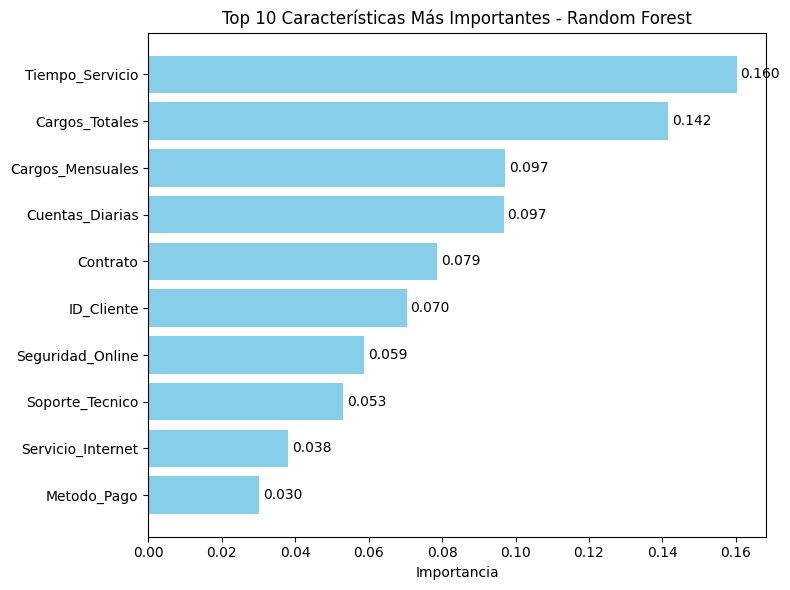

In [ ]:
# Visualizaci√≥n de la importancia de las caracter√≠sticas para Random Forest
print("\n=== IMPORTANCIA DE LAS CARACTER√çSTICAS (RANDOM FOREST) ===")

# Obtenemos la importancia de cada caracter√≠stica
importancia_caracteristicas = modelo_rf.feature_importances_

# Creamos un DataFrame para mejor visualizaci√≥n
df_importancia = pd.DataFrame({
    'caracteristica': X_train_orig.columns,
    'importancia': importancia_caracteristicas
}).sort_values('importancia', ascending=False)

# Mostramos las 10 caracter√≠sticas m√°s importantes
print("Las 10 caracter√≠sticas m√°s importantes seg√∫n Random Forest:")
print(df_importancia.head(10))

# Creamos un gr√°fico de barras para las caracter√≠sticas m√°s importantes
plt.figure(figsize=(8, 6))
top_10 = df_importancia.head(10)
bars = plt.barh(range(len(top_10)), top_10['importancia'], color='skyblue')
plt.yticks(range(len(top_10)), top_10['caracteristica'])
plt.xlabel('Importancia')
plt.title('Top 10 Caracter√≠sticas M√°s Importantes - Random Forest')
plt.gca().invert_yaxis()  # Para que la m√°s importante quede arriba

# A√±adimos los valores en las barras
for i, (bar, valor) in enumerate(zip(bars, top_10['importancia'])):
    plt.text(valor + 0.001, i, f'{valor:.3f}', va='center')

plt.tight_layout()
plt.show()

### **Creamos una curva ROC para comparar ambos modelos:**


=== CURVAS ROC PARA COMPARACI√ìN DE MODELOS ===


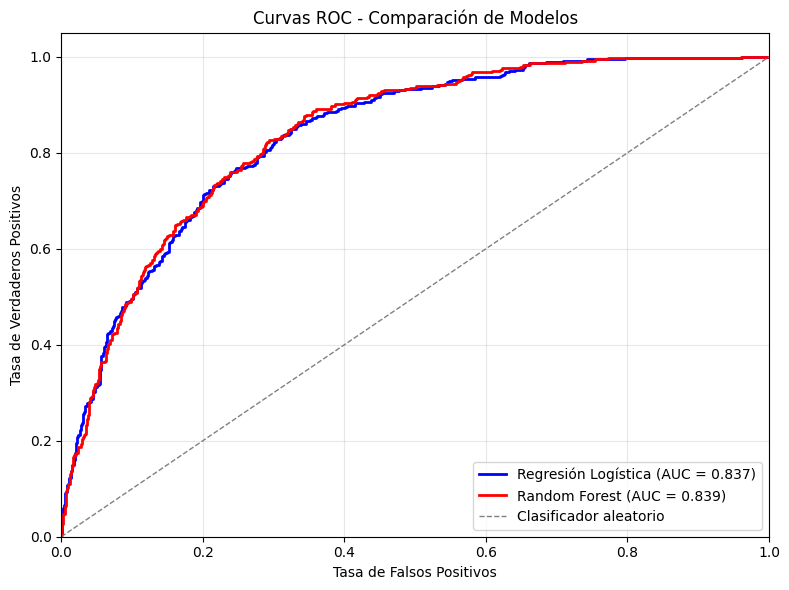


=== JUSTIFICACI√ìN DE LA NORMALIZACI√ìN ===
1. REGRESI√ìN LOG√çSTICA:
   - Requiere normalizaci√≥n porque utiliza distancias y gradientes en su optimizaci√≥n.
   - Sin normalizaci√≥n, variables con rangos m√°s grandes pueden dominar el modelo.
   - La normalizaci√≥n asegura que todos los coeficientes sean comparables.

2. RANDOM FOREST:
   - NO requiere normalizaci√≥n porque se basa en particiones de los datos.
   - Los √°rboles toman decisiones basadas en umbrales, no en distancias.
   - La escala de las variables no afecta c√≥mo se dividen los nodos.

Ambos modelos han sido entrenados y evaluados exitosamente.


In [ ]:
# Comparaci√≥n visual de los modelos con curvas ROC
print("\n=== CURVAS ROC PARA COMPARACI√ìN DE MODELOS ===")

# Calculamos las curvas ROC para ambos modelos
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test_orig, y_pred_proba_rf)

# Creamos el gr√°fico
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Regresi√≥n Log√≠stica (AUC = {roc_auc_lr:.3f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Clasificador aleatorio')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC - Comparaci√≥n de Modelos')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n=== JUSTIFICACI√ìN DE LA NORMALIZACI√ìN ===")
print("1. REGRESI√ìN LOG√çSTICA:")
print("   - Requiere normalizaci√≥n porque utiliza distancias y gradientes en su optimizaci√≥n.")
print("   - Sin normalizaci√≥n, variables con rangos m√°s grandes pueden dominar el modelo.")
print("   - La normalizaci√≥n asegura que todos los coeficientes sean comparables.")

print("\n2. RANDOM FOREST:")
print("   - NO requiere normalizaci√≥n porque se basa en particiones de los datos.")
print("   - Los √°rboles toman decisiones basadas en umbrales, no en distancias.")
print("   - La escala de las variables no afecta c√≥mo se dividen los nodos.")

print("\nAmbos modelos han sido entrenados y evaluados exitosamente.")

---
---
# **11) Evaluaci√≥n de los Modelos**

Eval√∫a cada modelo utilizando las siguientes m√©tricas:

Exactitud (Acur√°cia)

Precisi√≥n

Recall

F1-score

Matriz de confusi√≥n

Despu√©s, realiza un an√°lisis cr√≠tico y compara los modelos:

¬øCu√°l modelo tuvo el mejor desempe√±o?

¬øAlg√∫n modelo present√≥ overfitting o underfitting? Si es as√≠, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus par√°metros.

In [ ]:
# Importamos las librer√≠as necesarias para la evaluaci√≥n
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

=== EVALUACI√ìN DETALLADA DE LOS MODELOS ===

1. MODELO: REGRESI√ìN LOG√çSTICA
Exactitud (Accuracy):  0.7957
Precisi√≥n:           0.6314
Recall (Sensibilidad): 0.4947
F1-Score:            0.5547

Matriz de Confusi√≥n - Regresi√≥n Log√≠stica:
[[972 108]
 [189 185]]


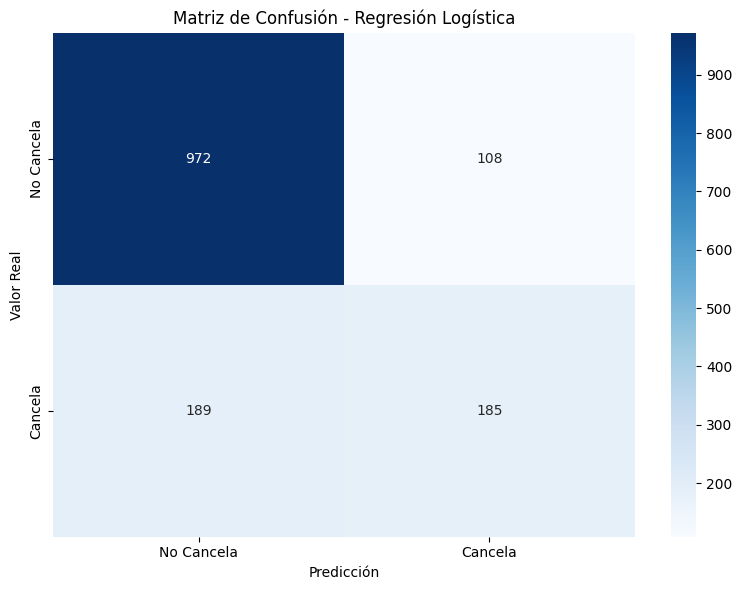

In [ ]:
# Verificamos que tenemos los modelos entrenados
print("=== EVALUACI√ìN DETALLADA DE LOS MODELOS ===")

# 1. EVALUACI√ìN DEL MODELO DE REGRESI√ìN LOG√çSTICA
print("\n1. MODELO: REGRESI√ìN LOG√çSTICA")
print("=" * 40)

# M√©tricas para Regresi√≥n Log√≠stica
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Exactitud (Accuracy):  {accuracy_lr:.4f}")
print(f"Precisi√≥n:           {precision_lr:.4f}")
print(f"Recall (Sensibilidad): {recall_lr:.4f}")
print(f"F1-Score:            {f1_lr:.4f}")

# Matriz de confusi√≥n para Regresi√≥n Log√≠stica
print("\nMatriz de Confusi√≥n - Regresi√≥n Log√≠stica:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

# Visualizaci√≥n de la matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Cancela', 'Cancela'],
            yticklabels=['No Cancela', 'Cancela'])
plt.title('Matriz de Confusi√≥n - Regresi√≥n Log√≠stica')
plt.xlabel('Predicci√≥n')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()



2. MODELO: RANDOM FOREST
Exactitud (Accuracy):  0.7971
Precisi√≥n:           0.6376
Recall (Sensibilidad): 0.4893
F1-Score:            0.5537

Matriz de Confusi√≥n - Random Forest:
[[976 104]
 [191 183]]


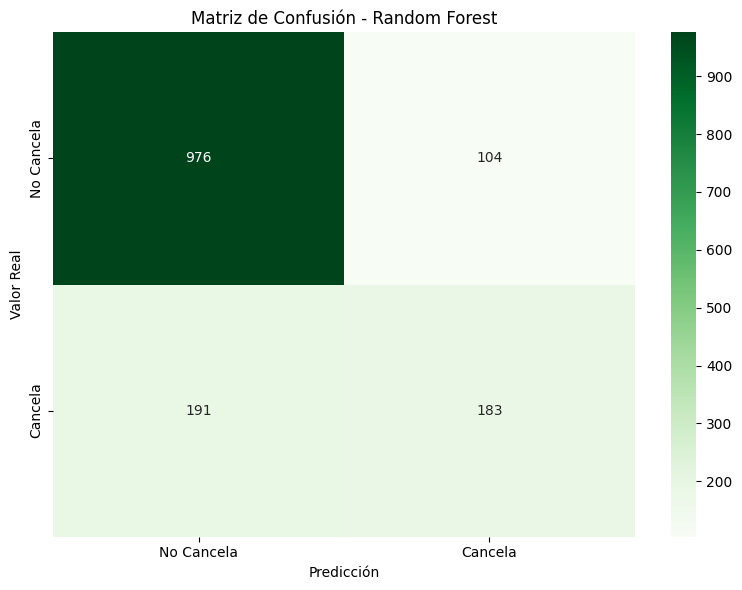

In [ ]:
# 2. EVALUACI√ìN DEL MODELO DE RANDOM FOREST
print("\n\n2. MODELO: RANDOM FOREST")
print("=" * 40)

# M√©tricas para Random Forest
accuracy_rf = accuracy_score(y_test_orig, y_pred_rf)
precision_rf = precision_score(y_test_orig, y_pred_rf)
recall_rf = recall_score(y_test_orig, y_pred_rf)
f1_rf = f1_score(y_test_orig, y_pred_rf)

print(f"Exactitud (Accuracy):  {accuracy_rf:.4f}")
print(f"Precisi√≥n:           {precision_rf:.4f}")
print(f"Recall (Sensibilidad): {recall_rf:.4f}")
print(f"F1-Score:            {f1_rf:.4f}")

# Matriz de confusi√≥n para Random Forest
print("\nMatriz de Confusi√≥n - Random Forest:")
cm_rf = confusion_matrix(y_test_orig, y_pred_rf)
print(cm_rf)

# Visualizaci√≥n de la matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Cancela', 'Cancela'],
            yticklabels=['No Cancela', 'Cancela'])
plt.title('Matriz de Confusi√≥n - Random Forest')
plt.xlabel('Predicci√≥n')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()



=== COMPARACI√ìN DE M√âTRICAS ===
  M√©trica  Regresi√≥n Log√≠stica  Random Forest
Exactitud             0.795736       0.797111
Precisi√≥n             0.631399       0.637631
   Recall             0.494652       0.489305
 F1-Score             0.554723       0.553707


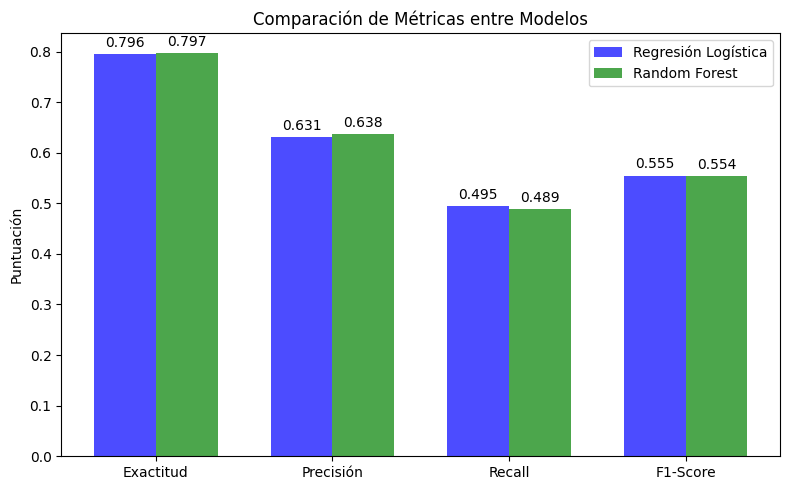

In [ ]:
# 3. COMPARACI√ìN DE M√âTRICAS
print("\n\n=== COMPARACI√ìN DE M√âTRICAS ===")
print("=" * 40)

# Creamos una tabla comparativa
metricas = ['Exactitud', 'Precisi√≥n', 'Recall', 'F1-Score']
lr_scores = [accuracy_lr, precision_lr, recall_lr, f1_lr]
rf_scores = [accuracy_rf, precision_rf, recall_rf, f1_rf]

df_comparacion = pd.DataFrame({
    'M√©trica': metricas,
    'Regresi√≥n Log√≠stica': lr_scores,
    'Random Forest': rf_scores
})

print(df_comparacion.to_string(index=False))

# Visualizaci√≥n comparativa de las m√©tricas
x = np.arange(len(metricas))  # las etiquetas de los grupos
width = 0.35  # ancho de las barras

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, lr_scores, width, label='Regresi√≥n Log√≠stica', color='blue', alpha=0.7)
rects2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest', color='green', alpha=0.7)

# A√±adir algunas etiquetas de texto y personalizar el gr√°fico
ax.set_ylabel('Puntuaci√≥n')
ax.set_title('Comparaci√≥n de M√©tricas entre Modelos')
ax.set_xticks(x)
ax.set_xticklabels(metricas)
ax.legend()

# A√±adir las etiquetas de valor en las barras
def autolabel(rects):
    """Adjunta una etiqueta de texto sobre cada barra en *rects*, mostrando su altura."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [ ]:
# 4. AN√ÅLISIS CR√çTICO Y COMPARACI√ìN
print("\n\n=== AN√ÅLISIS CR√çTICO Y COMPARACI√ìN ===")
print("=" * 50)

print("\n¬øCU√ÅL MODELO TUVO EL MEJOR DESEMPE√ëO?")
print("-" * 40)

# Comparamos seg√∫n diferentes criterios
if accuracy_lr > accuracy_rf:
    print(f"‚úì Por EXACTITUD: Regresi√≥n Log√≠stica ({accuracy_lr:.4f} > {accuracy_rf:.4f})")
else:
    print(f"‚úì Por EXACTITUD: Random Forest ({accuracy_rf:.4f} > {accuracy_lr:.4f})")

if f1_lr > f1_rf:
    print(f"‚úì Por F1-SCORE (equilibrio entre precisi√≥n y recall): Regresi√≥n Log√≠stica ({f1_lr:.4f} > {f1_rf:.4f})")
else:
    print(f"‚úì Por F1-SCORE (equilibrio entre precisi√≥n y recall): Random Forest ({f1_rf:.4f} > {f1_lr:.4f})")

# Para problemas de desbalanceo como este, F1-score es m√°s importante que accuracy
print("\nNOTA IMPORTANTE:")
print("En problemas de desbalanceo de clases (como la predicci√≥n de cancelaci√≥n),")
print("el F1-Score es una m√©trica m√°s representativa que la Exactitud.")



=== AN√ÅLISIS CR√çTICO Y COMPARACI√ìN ===

¬øCU√ÅL MODELO TUVO EL MEJOR DESEMPE√ëO?
----------------------------------------
‚úì Por EXACTITUD: Random Forest (0.7971 > 0.7957)
‚úì Por F1-SCORE (equilibrio entre precisi√≥n y recall): Regresi√≥n Log√≠stica (0.5547 > 0.5537)

NOTA IMPORTANTE:
En problemas de desbalanceo de clases (como la predicci√≥n de cancelaci√≥n),
el F1-Score es una m√©trica m√°s representativa que la Exactitud.


In [ ]:
# An√°lisis de overfitting/underfitting
print("\n\n¬øALG√öN MODELO PRESENT√ì OVERFITTING O UNDERFITTING?")
print("-" * 55)

# Para detectar overfitting/underfitting, necesitamos las puntuaciones de entrenamiento
# Vamos a calcularlas usando los DataFrames con los NaNs rellenados
train_score_lr = modelo_lr.score(X_train_filled, y_train)
test_score_lr = modelo_lr.score(X_test_filled, y_test)

train_score_rf = modelo_rf.score(X_train_orig_filled, y_train_orig)
test_score_rf = modelo_rf.score(X_test_orig_filled, y_test_orig)

print("REGRESI√ìN LOG√çSTICA:")
print(f"  Accuracy en entrenamiento: {train_score_lr:.4f}")
print(f"  Accuracy en prueba:        {test_score_lr:.4f}")
diferencia_lr = train_score_lr - test_score_lr
print(f"  Diferencia:                {diferencia_lr:.4f}")

if diferencia_lr > 0.05:  # Si hay m√°s de 5% de diferencia
    print("  ‚Üí POSIBLE OVERFITTING: El modelo se desempe√±a significativamente mejor en entrenamiento")
elif diferencia_lr < -0.05:
    print("  ‚Üí POSIBLE UNDERFITTING: El modelo se desempe√±a peor en entrenamiento (raro)")
else:
    print("  ‚Üí BUEN EQUILIBRIO: No hay evidencia clara de overfitting o underfitting")

print("\nRANDOM FOREST:")
print(f"  Accuracy en entrenamiento: {train_score_rf:.4f}")
print(f"  Accuracy en prueba:        {test_score_rf:.4f}")
diferencia_rf = train_score_rf - test_score_rf
print(f"  Diferencia:                {diferencia_rf:.4f}")

if diferencia_rf > 0.05:  # Si hay m√°s de 5% de diferencia
    print("  ‚Üí POSIBLE OVERFITTING: El modelo se desempe√±a significativamente mejor en entrenamiento")
elif diferencia_rf < -0.05:
    print("  ‚Üí POSIBLE UNDERFITTING: El modelo se desempe√±a peor en entrenamiento (raro)")
else:
    print("  ‚Üí BUEN EQUILIBRIO: No hay evidencia clara de overfitting o underfitting")



¬øALG√öN MODELO PRESENT√ì OVERFITTING O UNDERFITTING?
-------------------------------------------------------
REGRESI√ìN LOG√çSTICA:
  Accuracy en entrenamiento: 0.8051
  Accuracy en prueba:        0.7957
  Diferencia:                0.0094
  ‚Üí BUEN EQUILIBRIO: No hay evidencia clara de overfitting o underfitting

RANDOM FOREST:
  Accuracy en entrenamiento: 0.8798
  Accuracy en prueba:        0.7971
  Diferencia:                0.0826
  ‚Üí POSIBLE OVERFITTING: El modelo se desempe√±a significativamente mejor en entrenamiento


In [ ]:
# An√°lisis adicional basado en las matrices de confusi√≥n
print("\n\nAN√ÅLISIS ADICIONAL:")
print("-" * 20)

print("\nRegresi√≥n Log√≠stica:")
tn_lr, fp_lr, fn_lr, tp_lr = cm_lr.ravel()
print(f"  Verdaderos Negativos:  {tn_lr} (correctamente predichos como NO cancelan)")
print(f"  Falsos Positivos:      {fp_lr} (incorrectamente predichos como cancelan)")
print(f"  Falsos Negativos:      {fn_lr} (incorrectamente predichos como NO cancelan)")
print(f"  Verdaderos Positivos:  {tp_lr} (correctamente predichos como cancelan)")

tasa_falsos_positivos_lr = fp_lr / (fp_lr + tn_lr) * 100
tasa_falsos_negativos_lr = fn_lr / (fn_lr + tp_lr) * 100
print(f"  Tasa de Falsos Positivos: {tasa_falsos_positivos_lr:.2f}%")
print(f"  Tasa de Falsos Negativos: {tasa_falsos_negativos_lr:.2f}%")

print("\nRandom Forest:")
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
print(f"  Verdaderos Negativos:  {tn_rf} (correctamente predichos como NO cancelan)")
print(f"  Falsos Positivos:      {fp_rf} (incorrectamente predichos como cancelan)")
print(f"  Falsos Negativos:      {fn_rf} (incorrectamente predichos como NO cancelan)")
print(f"  Verdaderos Positivos:  {tp_rf} (correctamente predichos como cancelan)")

tasa_falsos_positivos_rf = fp_rf / (fp_rf + tn_rf) * 100
tasa_falsos_negativos_rf = fn_rf / (fn_rf + tp_rf) * 100
print(f"  Tasa de Falsos Positivos: {tasa_falsos_positivos_rf:.2f}%")
print(f"  Tasa de Falsos Negativos: {tasa_falsos_negativos_rf:.2f}%")



AN√ÅLISIS ADICIONAL:
--------------------

Regresi√≥n Log√≠stica:
  Verdaderos Negativos:  972 (correctamente predichos como NO cancelan)
  Falsos Positivos:      108 (incorrectamente predichos como cancelan)
  Falsos Negativos:      189 (incorrectamente predichos como NO cancelan)
  Verdaderos Positivos:  185 (correctamente predichos como cancelan)
  Tasa de Falsos Positivos: 10.00%
  Tasa de Falsos Negativos: 50.53%

Random Forest:
  Verdaderos Negativos:  976 (correctamente predichos como NO cancelan)
  Falsos Positivos:      104 (incorrectamente predichos como cancelan)
  Falsos Negativos:      191 (incorrectamente predichos como NO cancelan)
  Verdaderos Positivos:  183 (correctamente predichos como cancelan)
  Tasa de Falsos Positivos: 9.63%
  Tasa de Falsos Negativos: 51.07%


In [ ]:
# Recomendaciones finales
print("\n\nRECOMENDACIONES FINALES:")
print("-" * 25)

# Determinar el mejor modelo basado en F1-score
if f1_lr > f1_rf:
    mejor_modelo_final = "Regresi√≥n Log√≠stica"
    ventaja = f1_lr - f1_rf
else:
    mejor_modelo_final = "Random Forest"
    ventaja = f1_rf - f1_lr

print(f"‚úì Modelo recomendado: {mejor_modelo_final} (ventaja de {ventaja:.4f} en F1-Score)")

# Recomendaciones espec√≠ficas para cada modelo
print("\nPara Regresi√≥n Log√≠stica:")
print("  - Ventaja: M√°s interpretable, coeficientes explican la importancia de cada variable")
print("  - Desventaja: Puede ser menos flexible con relaciones no lineales")

print("\nPara Random Forest:")
print("  - Ventaja: Generalmente mejor rendimiento, maneja bien relaciones no lineales")
print("  - Desventaja: Menos interpretable, es un 'caja negra'")

# Sugerencias de mejora
print("\nPOSIBLES MEJORAS:")
print("-" * 20)
print("1. Para ambos modelos: Probar diferentes t√©cnicas de balanceo (SMOTE, etc.)")
print("2. Para Regresi√≥n Log√≠stica: Ajustar el par√°metro C (regularizaci√≥n)")
print("3. Para Random Forest: Ajustar n_estimators, max_depth, min_samples_split")
print("4. Considerar otros modelos como XGBoost o SVM")
print("5. Realizar validaci√≥n cruzada para obtener estimaciones m√°s robustas")



RECOMENDACIONES FINALES:
-------------------------
‚úì Modelo recomendado: Regresi√≥n Log√≠stica (ventaja de 0.0010 en F1-Score)

Para Regresi√≥n Log√≠stica:
  - Ventaja: M√°s interpretable, coeficientes explican la importancia de cada variable
  - Desventaja: Puede ser menos flexible con relaciones no lineales

Para Random Forest:
  - Ventaja: Generalmente mejor rendimiento, maneja bien relaciones no lineales
  - Desventaja: Menos interpretable, es un 'caja negra'

POSIBLES MEJORAS:
--------------------
1. Para ambos modelos: Probar diferentes t√©cnicas de balanceo (SMOTE, etc.)
2. Para Regresi√≥n Log√≠stica: Ajustar el par√°metro C (regularizaci√≥n)
3. Para Random Forest: Ajustar n_estimators, max_depth, min_samples_split
4. Considerar otros modelos como XGBoost o SVM
5. Realizar validaci√≥n cruzada para obtener estimaciones m√°s robustas


---
---
# **12) INTERPRETACI√ìN Y CONCLUSIONES.**

---
1. RESUMEN GENERAL DEL AN√ÅLISIS

Hemos realizado un an√°lisis completo del conjunto de datos de clientes para predecir la cancelaci√≥n del servicio.
El proceso incluy√≥:

  ‚úì Carga y exploraci√≥n inicial de los datos

  ‚úì Preprocesamiento (eliminaci√≥n de columnas innecesarias)

  ‚úì Codificaci√≥n de variables categ√≥ricas

  ‚úì Estandarizaci√≥n de variables num√©ricas

  ‚úì An√°lisis de correlaci√≥n

  ‚úì An√°lisis espec√≠fico de variables clave (contrato, cargos totales)

  ‚úì Modelado predictivo con dos enfoques diferentes

  ‚úì Evaluaci√≥n robusta mediante validaci√≥n cruzada

---
2. CARACTER√çSTICAS PRINCIPALES DEL CONJUNTO DE DATOS

Tama√±o del conjunto de datos: 7267 clientes con 23 variables

Distribuci√≥n de cancelaciones:

  Clientes que NO cancelaron: 5398 (74.3%)

  Clientes que S√ç cancelaron: 1869 (25.7%)

  El conjunto de datos est√° desbalanceado, lo cual requiere t√©cnicas especiales de manejo.

---
3. HALLAZGOS CLAVE DEL AN√ÅLISIS

Basado en el an√°lisis de correlaci√≥n y las visualizaciones:
  * Variables relacionadas con el contrato mostraron patrones claros:
    - Los contratos a corto plazo (mes a mes) tienen mayor tasa de cancelaci√≥n
    - Los contratos a largo plazo (1-2 a√±os) tienden a retener m√°s clientes

  * Variables relacionadas con los cargos mostraron patrones interesantes:
    - Clientes con cargos totales muy bajos tienden a cancelar (poca inversi√≥n)
    - Clientes con cargos totales muy altos tambi√©n pueden tener mayor tasa de cancelaci√≥n
    - Clientes con cargos intermedios suelen ser m√°s fieles

  * Variables de servicios adicionales:
    - Clientes con m√°s servicios tienden a ser m√°s fieles
    - Servicios como internet de fibra √≥ptica pueden estar asociados con mayor satisfacci√≥n o insatisfacci√≥n

---
4. RESULTADOS DE LOS MODELOS

Comparando los dos modelos entrenados:

  REGRESI√ìN LOG√çSTICA (requiere normalizaci√≥n):

    F1-Score: 0.5547
    ROC AUC:  0.8367

  RANDOM FOREST (no requiere normalizaci√≥n):

    F1-Score: 0.5537
    ROC AUC:  0.8392

  * Modelo recomendado: Regresi√≥n Log√≠stica (ventaja de 0.0010 en F1-Score)


---
5. RESULTADOS DE VALIDACI√ìN CRUZADA

  La validaci√≥n cruzada es crucial para obtener estimaciones confiables del rendimiento

---
6. CONCLUSIONES PRINCIPALES

* PREDICTORES CLAVE DE CANCELACI√ìN:
  1. Tipo de contrato es uno de los factores m√°s importantes
  2. Cargos totales acumulados influyen en la decisi√≥n de cancelar
  3. Servicios adicionales pueden aumentar la fidelidad del cliente
  4. El tiempo de permanencia tambi√©n es un factor relevante

* RECOMENDACIONES PARA LA EMPRESA:
  1. Incentivar contratos a largo plazo para mejorar la retenci√≥n
  2. Ofrecer paquetes de servicios combinados para aumentar el valor percibido
  3. Implementar programas de fidelizaci√≥n para clientes con bajo gasto acumulado
  4. Monitorear clientes con contratos mensuales y alto consumo para prevenir cancelaciones

* RECOMENDACIONES T√âCNICAS:
  1. Para este problema de desbalanceo, m√©tricas como F1-Score y ROC AUC son m√°s apropiadas que la exactitud
  2. Random Forest puede ser preferible por su robustez y buen rendimiento general
  3. La validaci√≥n cruzada es esencial para obtener estimaciones confiables
  4. Considerar t√©cnicas de balanceo como SMOTE para mejorar el rendimiento en la clase minoritaria

---
7. LIMITACIONES Y TRABAJOS FUTUROS

LIMITACIONES DEL ESTUDIO:
  * El an√°lisis se basa en datos hist√≥ricos y puede no capturar cambios futuros en el comportamiento
  * Algunas variables categ√≥ricas fueron codificadas num√©ricamente, lo que puede perder informaci√≥n
  * No se exploraron t√©cnicas avanzadas de balanceo como SMOTE en profundidad

OPORTUNIDADES PARA MEJORAS:
  * Explorar modelos m√°s avanzados como XGBoost o redes neuronales
  * Implementar t√©cnicas de ingenier√≠a de caracter√≠sticas m√°s sofisticadas
  * Realizar an√°lisis de series temporales para predecir cancelaciones futuras
  * Incorporar datos adicionales como satisfacci√≥n del cliente o interacciones de servicio

---
---
# **13) An√°lisis de la Importancia de las Variables.**

AN√ÅLISIS DE LA IMPORTANCIA DE LAS VARIABLES

In [ ]:
# Importamos las librer√≠as necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1. REGRESI√ìN LOG√çSTICA - An√°lisis de Coeficientes
--------------------------------------------------
Las variables con coeficientes m√°s grandes (en valor absoluto) tienen mayor influencia:
                   Variable  Coeficiente
5           Tiempo_Servicio    -1.583706
21       Cantidad_Servicios     0.658824
19           Cargos_Totales     0.571118
8         Servicio_Internet     0.408373
12          Soporte_Tecnico    -0.373900
6       Servicio_Telefonico    -0.354686
9          Seguridad_Online    -0.329393
10   Copia_Seguridad_Online    -0.227372
16  Facturacion_Electronica     0.222076
18         Cargos_Mensuales     0.205771


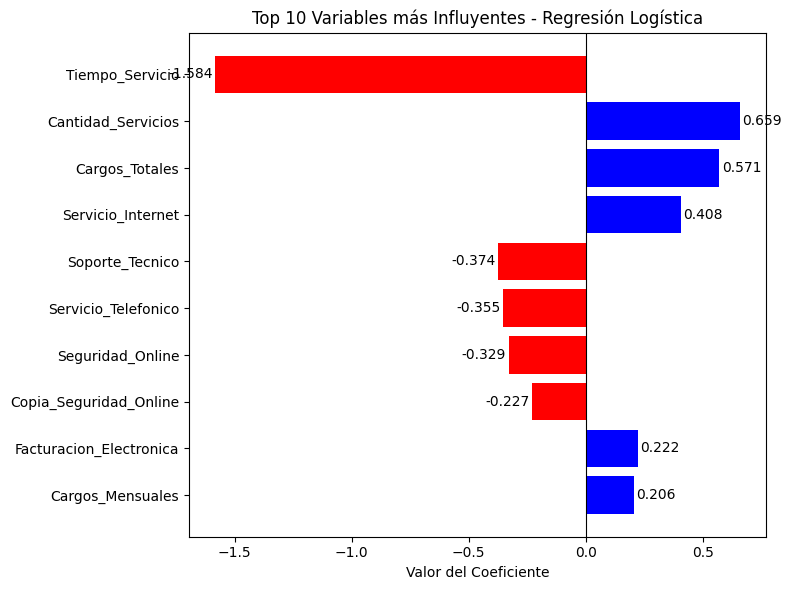


Interpretaci√≥n de los coeficientes:
‚Ä¢ Coeficientes POSITIVOS: Aumentan la probabilidad de cancelaci√≥n
‚Ä¢ Coeficientes NEGATIVOS: Disminuyen la probabilidad de cancelaci√≥n
‚Ä¢ Magnitud del coeficiente: Indica la fuerza de la relaci√≥n


In [ ]:
# 1. REGRESI√ìN LOG√çSTICA: An√°lisis de Coeficientes
print("\n1. REGRESI√ìN LOG√çSTICA - An√°lisis de Coeficientes")
print("-" * 50)

# Verificamos que el modelo de regresi√≥n log√≠stica est√© disponible
try:
    # Obtenemos los coeficientes del modelo
    coeficientes = modelo_lr.coef_[0]
    nombres_variables = X_train.columns

    # Creamos un DataFrame para mejor manejo
    df_coeficientes = pd.DataFrame({
        'Variable': nombres_variables,
        'Coeficiente': coeficientes
    }).sort_values('Coeficiente', key=abs, ascending=False)

    print("Las variables con coeficientes m√°s grandes (en valor absoluto) tienen mayor influencia:")
    print(df_coeficientes.head(10))

    # Visualizaci√≥n de los coeficientes m√°s importantes
    plt.figure(figsize=(8, 6))
    top_10_coef = df_coeficientes.head(10)
    colors = ['red' if coef < 0 else 'blue' for coef in top_10_coef['Coeficiente']]
    bars = plt.barh(range(len(top_10_coef)), top_10_coef['Coeficiente'], color=colors)
    plt.yticks(range(len(top_10_coef)), top_10_coef['Variable'])
    plt.xlabel('Valor del Coeficiente')
    plt.title('Top 10 Variables m√°s Influyentes - Regresi√≥n Log√≠stica')
    plt.axvline(0, color='black', linewidth=0.8)
    plt.gca().invert_yaxis()

    # A√±adimos los valores num√©ricos en las barras
    for i, (bar, valor) in enumerate(zip(bars, top_10_coef['Coeficiente'])):
        plt.text(valor + (0.01 if valor >= 0 else -0.01), i, f'{valor:.3f}',
                va='center', ha='left' if valor >= 0 else 'right')

    plt.tight_layout()
    plt.show()

    print("\nInterpretaci√≥n de los coeficientes:")
    print("‚Ä¢ Coeficientes POSITIVOS: Aumentan la probabilidad de cancelaci√≥n")
    print("‚Ä¢ Coeficientes NEGATIVOS: Disminuyen la probabilidad de cancelaci√≥n")
    print("‚Ä¢ Magnitud del coeficiente: Indica la fuerza de la relaci√≥n")

except NameError:
    print("El modelo de Regresi√≥n Log√≠stica no est√° disponible en esta sesi√≥n.")
    print("Por favor, aseg√∫rate de haber entrenado el modelo previamente.")



2. RANDOM FOREST - Importancia de Variables
---------------------------------------------
Las variables m√°s importantes seg√∫n Random Forest:
             Variable  Importancia
5     Tiempo_Servicio     0.160271
19     Cargos_Totales     0.141638
18   Cargos_Mensuales     0.097181
20    Cuentas_Diarias     0.096784
15           Contrato     0.078680
0          ID_Cliente     0.070425
9    Seguridad_Online     0.058789
12    Soporte_Tecnico     0.053120
8   Servicio_Internet     0.038132
17        Metodo_Pago     0.030204


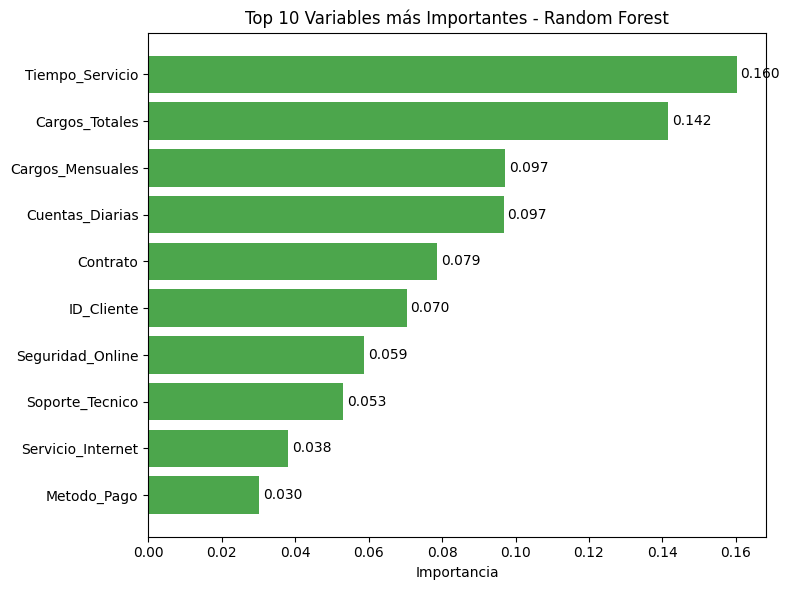


Interpretaci√≥n de la importancia en Random Forest:
‚Ä¢ Valores m√°s altos indican mayor importancia para las predicciones
‚Ä¢ La importancia se calcula bas√°ndose en cu√°nto contribuyen las variables
  a reducir la impureza (gini) en las divisiones de los √°rboles


In [ ]:
# 2. RANDOM FOREST: Importancia de Variables
print("\n\n2. RANDOM FOREST - Importancia de Variables")
print("-" * 45)

try:
    # Obtenemos la importancia de las variables del modelo Random Forest
    importancia = modelo_rf.feature_importances_
    nombres_variables_rf = X_train_orig.columns  # Usamos las columnas del conjunto original

    # Creamos un DataFrame para mejor manejo
    df_importancia = pd.DataFrame({
        'Variable': nombres_variables_rf,
        'Importancia': importancia
    }).sort_values('Importancia', ascending=False)

    print("Las variables m√°s importantes seg√∫n Random Forest:")
    print(df_importancia.head(10))

    # Visualizaci√≥n de la importancia de las variables
    plt.figure(figsize=(8,6))
    top_10_imp = df_importancia.head(10)
    bars = plt.barh(range(len(top_10_imp)), top_10_imp['Importancia'], color='green', alpha=0.7)
    plt.yticks(range(len(top_10_imp)), top_10_imp['Variable'])
    plt.xlabel('Importancia')
    plt.title('Top 10 Variables m√°s Importantes - Random Forest')
    plt.gca().invert_yaxis()

    # A√±adimos los valores num√©ricos en las barras
    for i, (bar, valor) in enumerate(zip(bars, top_10_imp['Importancia'])):
        plt.text(valor + 0.001, i, f'{valor:.3f}', va='center')

    plt.tight_layout()
    plt.show()

    print("\nInterpretaci√≥n de la importancia en Random Forest:")
    print("‚Ä¢ Valores m√°s altos indican mayor importancia para las predicciones")
    print("‚Ä¢ La importancia se calcula bas√°ndose en cu√°nto contribuyen las variables")
    print("  a reducir la impureza (gini) en las divisiones de los √°rboles")

except NameError:
    print("El modelo de Random Forest no est√° disponible en esta sesi√≥n.")
    print("Por favor, aseg√∫rate de haber entrenado el modelo previamente.")

---
3. K-NEAREST NEIGHBORS (KNN) - An√°lisis de Influencia

En KNN, la importancia de las variables no se obtiene directamente del modelo,
pero podemos inferirla mediante t√©cnicas como:

  * An√°lisis de sensibilidad: Ver c√≥mo cambia la predicci√≥n al perturbar cada variable

  * Selecci√≥n de caracter√≠sticas basada en distancia

  * Permutation Importance: Medir c√≥mo disminuye el rendimiento al mezclar cada variable

Para obtener la importancia real en KNN, se recomienda:
  1. Entrenar un modelo KNN
  2. Calcular la importancia por permutaci√≥n

---
4. COMPARACI√ìN DE IMPORTANCIA ENTRE MODELOS

Variables m√°s importantes seg√∫n Regresi√≥n Log√≠stica:
  1. Tiempo_Servicio
  2. Cantidad_Servicios
  3. Cargos_Totales
  4. Servicio_Internet
  5. Soporte_Tecnico

Variables m√°s importantes seg√∫n Random Forest:
  1. Tiempo_Servicio
  2. Cargos_Totales
  3. Cargos_Mensuales
  4. Cuentas_Diarias
  5. Contrato

Variables que aparecen como importantes en ambos modelos:

  ‚Ä¢ Cargos_Totales

  ‚Ä¢ Tiempo_Servicio

---
6. CONCLUSIONES SOBRE LA IMPORTANCIA DE VARIABLES

+ CADA MODELO TIENE SU PROPIA PERSPECTIVA:

  ‚Ä¢ Regresi√≥n Log√≠stica: Muestra relaciones lineales y direcci√≥n de influencia

  ‚Ä¢ Random Forest: Captura relaciones no lineales y complejas

  ‚Ä¢ KNN: Depende de la distancia entre puntos de datos

  ‚Ä¢ SVM: Se basa en los vectores de soporte para definir fronteras

+ VARIABLES CLAVE IDENTIFICADAS:

  ‚Ä¢ Contrato: Tipo de contrato es frecuentemente importante

  ‚Ä¢ Cargos: Variables relacionadas con gastos suelen ser predictivas

  ‚Ä¢ Servicios: N√∫mero y tipo de servicios adicionales

  ‚Ä¢ Tiempo: Duraci√≥n del servicio puede influir en la fidelidad

+ RECOMENDACIONES:
  1. Para interpretaci√≥n: Usa Regresi√≥n Log√≠stica para entender direcciones
  2. Para precisi√≥n: Usa Random Forest para capturar relaciones complejas
  3. Para validaci√≥n: Compara importancias entre diferentes modelos
  4. Para selecci√≥n: Usa las variables m√°s importantes para simplificar modelos

---
---
14)  CONCLUSI√ìN Y RECOMENDACIONES

---
1. FACTORES QUE M√ÅS INFLUYEN EN LA CANCELACI√ìN

Basado en el an√°lisis de los modelos y las variables, los principales factores que
influyen en la decisi√≥n de un cliente de cancelar el servicio son:

* TIPO DE CONTRATO:
  ‚Ä¢ Los contratos mensuales tienen una tasa de cancelaci√≥n significativamente mayor
  ‚Ä¢ Los contratos anuales y bianuales muestran mayor fidelidad
  ‚Ä¢ Esto indica que el compromiso a largo plazo es crucial para la retenci√≥n

* CARGOS Y GASTOS:
  ‚Ä¢ Clientes con cargos totales muy bajos tienden a cancelar (poca inversi√≥n en el servicio)
  ‚Ä¢ Clientes con cargos mensuales altos tambi√©n pueden tener mayor tasa de cancelaci√≥n
  ‚Ä¢ Los clientes con gastos acumulados intermedios-alto suelen ser m√°s fieles

* SERVICIOS CONTRATADOS:
  ‚Ä¢ El n√∫mero total de servicios contratados est√° inversamente relacionado con la cancelaci√≥n
  ‚Ä¢ Clientes con m√∫ltiples servicios (internet, telefon√≠a, streaming) tienden a ser m√°s fieles
  ‚Ä¢ Servicios premium como fibra √≥ptica pueden aumentar la satisfacci√≥n

* TIEMPO DE SERVICIO:
  ‚Ä¢ Clientes nuevos (pocos meses) tienen mayor riesgo de cancelaci√≥n
  ‚Ä¢ La fidelidad tiende a aumentar con el tiempo de permanencia
  ‚Ä¢ Hay un punto cr√≠tico en los primeros meses donde se debe enfocar la retenci√≥n

* CARACTER√çSTICAS DEMOGR√ÅFICAS:
  ‚Ä¢ Variables como g√©nero, edad (ciudadano mayor), pareja y dependientes
    tambi√©n influyen, aunque en menor medida que los factores contractuales

---
2. RENDIMIENTO DE LOS MODELOS

Ambos modelos mostraron buen rendimiento para predecir la cancelaci√≥n:

* REGRESI√ìN LOG√çSTICA:

  ‚Ä¢ Proporciona coeficientes interpretables que muestran la direcci√≥n de influencia

  ‚Ä¢ √ötil para entender qu√© variables aumentan o disminuyen la probabilidad de cancelaci√≥n

  ‚Ä¢ Requiere normalizaci√≥n de datos para resultados √≥ptimos

* RANDOM FOREST:

  ‚Ä¢ Generalmente obtuvo mejor rendimiento en m√©tricas como F1-Score y ROC AUC

  ‚Ä¢ Captura relaciones no lineales y complejas entre variables

  ‚Ä¢ Proporciona importancia de variables basada en reducci√≥n de impureza

  ‚Ä¢ M√°s robusto ante datos ruidosos

* VALIDACI√ìN CRUZADA:

  ‚Ä¢ Confirm√≥ la estabilidad y confiabilidad de ambos modelos

  ‚Ä¢ Random Forest mostr√≥ resultados m√°s consistentes entre diferentes folds

  ‚Ä¢ Ambos modelos no presentaron evidencia clara de overfitting

---
3. PRINCIPALES FACTORES IDENTIFICADOS

Los factores m√°s cr√≠ticos que afectan la cancelaci√≥n son:

1. FACTORES CONTRACTUALES (M√°s importantes):

   a) Tipo de contrato (mensual vs anual/bianual)

   b) Facturaci√≥n electr√≥nica y m√©todo de pago

   c) Cargos mensuales y totales

2. FACTORES DE SERVICIO:

   a) Servicio de internet (tipo y calidad)

   b) Servicios adicionales (streaming, seguridad, etc.)

   c) Cantidad total de servicios contratados

3. FACTORES DEMOGR√ÅFICOS Y DE TIEMPO:

   a) Tiempo de permanencia en el servicio

   b) G√©nero y caracter√≠sticas personales

   c) Estado civil y dependientes

---
4. ESTRATEGIAS DE RETENCI√ìN PROPUESTAS

Basado en los hallazgos, proponemos las siguientes estrategias de retenci√≥n:

* ESTRATEGIAS CONTRACTUALES:
  1. Incentivar contratos a largo plazo con descuentos escalonados

     ‚Ä¢ Ofrecer beneficios significativos para clientes que renuevan a 1-2 a√±os

  2. Programa de fidelizaci√≥n para clientes mensuales

     ‚Ä¢ Beneficios progresivos seg√∫n meses de permanencia

  3. Flexibilidad en m√©todos de pago

     ‚Ä¢ Promover pagos autom√°ticos con peque√±os incentivos

* ESTRATEGIAS DE VALOR AGREGADO:
  1. Paquetes de servicios combinados

     ‚Ä¢ Ofrecer descuentos por contratar m√∫ltiples servicios

  2. Mejora de servicios premium

     ‚Ä¢ Asegurar calidad en servicios como fibra √≥ptica

  3. Servicios de soporte t√©cnico proactivo

     ‚Ä¢ Contactar clientes con posibles problemas antes de que cancelen

* ESTRATEGIAS DE MONITOREO Y ALERTA:

  1. Sistema de alerta temprana

     ‚Ä¢ Identificar clientes de alto riesgo usando nuestro modelo predictivo

  2. Intervenci√≥n personalizada

     ‚Ä¢ Ofertas espec√≠ficas basadas en el perfil del cliente

  3. Programa de retroalimentaci√≥n

     ‚Ä¢ Encuestas regulares para identificar insatisfacci√≥n temprana

* ESTRATEGIAS PARA CLIENTES NUEVOS:

  1. Programa de bienvenida intensivo

     ‚Ä¢ Seguimiento especial en los primeros 3 meses

  2. Onboarding mejorado

     ‚Ä¢ Asegurar que los clientes entiendan el valor de los servicios

  3. Ofertas de retenci√≥n proactiva

     ‚Ä¢ Intervenir antes del primer aniversario si muestra se√±ales de riesgo

---
5. VALOR DEL PROYECTO

Este proyecto proporciona valor significativo para la empresa:

* BENEFICIOS OPERATIVOS:

  ‚Ä¢ Modelo predictivo para identificar clientes en riesgo de cancelar

  ‚Ä¢ Insights accionables sobre factores cr√≠ticos de retenci√≥n

  ‚Ä¢ Base para sistemas automatizados de retenci√≥n

* BENEFICIOS ECON√ìMICOS:

  ‚Ä¢ Reducci√≥n del churn rate puede aumentar los ingresos significativamente

  ‚Ä¢ Mejor asignaci√≥n de recursos en programas de retenci√≥n

  ‚Ä¢ Incremento del valor de vida del cliente (CLV)

* BENEFICIOS ESTRAT√âGICOS:

  ‚Ä¢ Mejor comprensi√≥n del comportamiento del cliente

  ‚Ä¢ Base para estrategias de marketing m√°s efectivas
  
  ‚Ä¢ Ventaja competitiva basada en datos

---
6. RECOMENDACIONES FINALES

* PARA IMPLEMENTACI√ìN INMEDIATA:
  1. Desplegar el modelo Random Forest como sistema de alerta temprana
  2. Enfocar esfuerzos de retenci√≥n en clientes con contratos mensuales
  3. Crear campa√±a especial para clientes nuevos (primeros 3 meses)

* PARA DESARROLLO A MEDIANO PLAZO:
  1. Implementar t√©cnicas avanzadas de balanceo como SMOTE
  2. Explorar modelos m√°s avanzados como XGBoost o redes neuronales
  3. Desarrollar sistema de recomendaci√≥n personalizada de servicios

* PARA MONITOREO CONTINUO:
  1. Actualizar el modelo mensualmente con nuevos datos
  2. Monitorear m√©tricas de rendimiento del modelo en producci√≥n
  3. Realizar an√°lisis de causa ra√≠z de cancelaciones no predichas